# Homework 03: Learning Curves and Training Workflow

## Due: Midnight on September 21 (with 2-hour grace period)

**Points:** 85

In this assignment, you will learn how to design, train, and evaluate neural networks by systematically exploring key design choices. Your focus will be on developing an effective **training workflow** — using learning curves and validation metrics to guide your decisions.

We'll use the **Forest Cover Type (Covertype) dataset,** which has ~581k tabular records with 54 cartographic/topographic features (elevation, aspect, slope, soil and wilderness indicators) used to predict one of seven tree cover types in Colorado’s Roosevelt National Forest. It’s a large, mildly imbalanced multi-class benchmark commonly used to compare classical ML and deep learning on tabular data.

We will start with a **baseline model** (two hidden layers of sizes 64 and 32), and gradually introduce and tune different hyperparameters. Each of the first five problems considers  different hyperparameter choices, and the last problem is your chance to use what you have learned to design your best model:

1. **Activation function** – Compare ReLU, sigmoid, and tanh to see which provides the best accuracy.
2. **Learning rate** – Explore a range of learning rates and identify which balances convergence speed and stability.
3. **Dropout** – Investigate how different dropout rates reduce overfitting and where they are most effective.
4. **L2 regularization** – Experiment with weight penalties to encourage simpler models and avoid memorization.
5. **Dropout + L2** – Combine both regularization techniques and study their interaction.
6. **Best model design** – Use all your insights to build and train your strongest model, with the option to try **learning rate scheduling** for further improvement.

Throughout, you will use **early stopping** to select the model at the epoch of **minimum validation loss**, and you will report the **validation accuracy** of that selected model as the primary measure of performance.

By the end of this homework, you will not only understand how different hyperparameters affect training and generalization, but also gain hands-on practice in building a disciplined workflow for model development.

There are 10 graded problems, worth 8 points each, with 5 points for free if you complete the homework. 

In [3]:
import sys, subprocess

# Install core data-science packages compatible with TF 2.17 on Python 3.12
to_install = [
    "pandas==2.2.2",
    "numpy==2.0.2",
    "scipy==1.14.1",
    "scikit-learn==1.5.2",
    "ml-dtypes==0.5.0",
]
for pkg in to_install:
    print("Installing", pkg)
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--no-cache-dir", pkg])

# If TensorFlow wasn't installed earlier (just in case)
try:
    import tensorflow as tf  # noqa
except Exception:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--no-cache-dir", "tensorflow==2.17.1"])

Installing pandas==2.2.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 177.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 289.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0/2 [numpy]

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pandas]2m1/2 [pandas]
Installing numpy==2.0.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras 3.11.3 requires ml-dtypes, which is not installed.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 199.5 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.3
    Uninstalling numpy-2.3.3:
      Successfully uninstalled numpy-2.3.3


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras 3.11.3 requires ml-dtypes, which is not installed.


Installing scipy==1.14.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 226.8 MB/s  0:00:00
Installing scikit-learn==1.5.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 196.2 MB/s  0:00:00
Installing ml-dtypes==0.5.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 105.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.4/601.4 MB 114.2 MB/s  0:00:05eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 208.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 132.8 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2━━━━━━ 0/3 [numpy]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0/3 [numpy]

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


  Attempting uninstall: ml-dtypes━━━━━━━━━━━━━━━ 0/3 [numpy]
    Found existing installation: ml_dtypes 0.5.0 0/3 [numpy]
    Uninstalling ml_dtypes-0.5.0:━━━━━━━━━━━ 0/3 [numpy]
      Successfully uninstalled ml_dtypes-0.5.00m 0/3 [numpy]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━ 2/3 [tensorflow]

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [tensorflow]3 [tensorflow]


In [4]:
# Useful imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import time
import os

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Dropout
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay


from tensorflow.keras.datasets import fashion_mnist

# utility code

random_seed = 42

def format_hms(seconds):
    return time.strftime("%H:%M:%S", time.gmtime(seconds))

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppresses INFO and WARNING messages


2025-09-20 00:14:03.930400: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-20 00:14:04.087130: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-20 00:14:04.182198: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-20 00:14:04.342193: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-20 00:14:04.379209: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-20 00:14:04.605558: I tensorflow/core/platform/cpu_feature_gu

In [5]:
# Utility function to plot learning curves and keep track of all results

# Call `print_results()` to see listing of all results logged so far


def plot_learning_curves(hist, title, verbose=True):
    
    val_losses = hist.history['val_loss']
    min_val_loss = min(val_losses)
    min_val_epoch = val_losses.index(min_val_loss)
    val_acc_at_min_loss = hist.history['val_accuracy'][min_val_epoch]

    epochs = range(1, len(val_losses) + 1)  # epoch numbers starting at 1

    fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

    # --- Loss Plot ---
    axs[0].plot(epochs, hist.history['loss'], label='train loss')
    axs[0].plot(epochs, hist.history['val_loss'], label='val loss')
    axs[0].scatter(min_val_epoch + 1, min_val_loss, color='red', marker='x', s=50, label='min val loss')
    axs[0].set_title(f'{title} - Categorical Cross-Entropy Loss')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    axs[0].grid(True)

    # --- Accuracy Plot ---
    axs[1].plot(epochs, hist.history['accuracy'], label='train acc')
    axs[1].plot(epochs, hist.history['val_accuracy'], label='val acc')
    axs[1].scatter(min_val_epoch + 1, val_acc_at_min_loss, color='red', marker='x', s=50, label='acc @ min val loss')
    axs[1].set_title(f'{title} - Accuracy')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()
    axs[1].grid(True)
    axs[1].set_ylim(0, 1.05)

    plt.tight_layout()
    plt.show()

    if verbose:
        print(f"Final Training Loss:            {hist.history['loss'][-1]:.4f}")
        print(f"Final Training Accuracy:        {hist.history['accuracy'][-1]:.4f}")
        print(f"Final Validation Loss:          {hist.history['val_loss'][-1]:.4f}")
        print(f"Final Validation Accuracy:      {hist.history['val_accuracy'][-1]:.4f}")
        print(f"Minimum Validation Loss:        {min_val_loss:.4f} (Epoch {min_val_epoch + 1})")
        print(f"Validation Accuracy @ Min Loss: {val_acc_at_min_loss:.4f}")

    results[title] = (val_acc_at_min_loss,{min_val_epoch + 1})

results = {}

**The plotting function will record the validation accuracy for each experiment, using the plot title as key. The next function will print these out (see the last cell in the notebook).**


In order to see all results, you must give a different plot title to each experiment.

In [7]:
def print_results():
    for title, (acc, ep) in sorted(results.items(), 
                                   key=lambda kv: kv[1][0],   # kv[1] is (acc, epoch); [0] is acc
                                   reverse=True
                                  ):
        print(f"{title:<40}\t{acc:.4f}")

### Wrapper to train, display results, and run test set

We assume multi-class classification, and allow setting various parameters for training. 

In [15]:
# Uses globals X_train,y_train,X_val,y_val

def train_and_test(model, 
                   epochs        = 500,                   # Just needs to be bigger than early stop point
                   lr_schedule   = 0.001,                 # Adam default / 10 seems to work well for this dataset
                   optimizer     = "Adam",
                   title         = "Learning Curves",
                   batch_size    = 64,                     # experiments confirmed this was optimal with other parameters at default
                   use_early_stopping = True,
                   patience      = 10,                                       
                   min_delta     = 0.0001,                 
                   callbacks     = [],                     # for extra callbacks other than early stopping
                   verbose       = 0,
                   return_history = False
                  ):

    print(f"\n{title}\n")


    if optimizer == "Adam":
        opt = Adam(learning_rate=lr_schedule) 
    else:
        opt = optimizer
    
    #Compiling the model
    model.compile(optimizer=opt, 
                  loss="sparse_categorical_crossentropy", 
                  metrics=["accuracy"]
                 )

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=patience,
        min_delta=min_delta,
        restore_best_weights=True,               # this will mean that the model which produced the smallest validation loss will be returned
        verbose=verbose
    )
    

    if use_early_stopping:
        cbs=[early_stop] + callbacks
    else:
        cbs=callbacks

    # start timer
    start = time.time()
    
    # Fit the model with early stopping
    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_val, y_val),       # must use stratified validation set
                        callbacks=cbs,
                        verbose=verbose
                       )

    # Select by *minimum validation loss* (your stated rule)
    best_epoch = int(np.argmin(history.history['val_loss']))   # 0-based
    best_acc   = float(history.history['val_accuracy'][best_epoch])
    
    # Plot training history
    plot_learning_curves(history, title=title)

    # Evaluate on test data
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    print(f"\nTest Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    print(f"\nValidation-Test Gap (accuracy): {abs(best_acc - test_accuracy):.6f}")
    
    # Record end time and print execution time
    end = time.time()
    print(f"\nExecution Time: " + format_hms(end-start))

    if return_history:
        return history

### Load the dataset and extract a stratified subset

This datasest is rather large (581,012 samples) and unbalanced, but for the purposes of this homework, we use a much smaller set, and select samples so that it is balanced. 

In [9]:
# complete cell: load, balance, split into X_train/y_train/x_val/y_val/X_test/y_test, and standardize
from collections import Counter
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1) load
x, y = fetch_covtype(return_X_y=True)  # y in {1..7}
print("full dataset shape:", x.shape)

# 2) build a perfectly balanced subset across 7 classes (no replacement)
classes, counts = np.unique(y, return_counts=True)
# min_count = counts.min()  # size of rarest class                         # You can modify this parameter to increase the size of the dataset, but above
min_count = 1000                                                           # counts.min() you'll produce an unbalanced set. 


rng = np.random.default_rng(42)

idx_list = []
for c in classes:
    c_idx = np.where(y == c)[0]
    chosen = rng.choice(c_idx, size=min_count, replace=False)
    idx_list.append(chosen)

idx_bal = np.concatenate(idx_list)
rng.shuffle(idx_bal)

X_sub = x[idx_bal]
y_sub = y[idx_bal] - 1  # relabel to {0..6} for keras
print("balanced subset shape:", X_sub.shape, "class counts:", dict(Counter(y_sub)))

# 3) stratified 60/20/20 split (train/val/test)
test_size = 0.20
val_size = 0.20  # of the whole dataset

X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_sub, y_sub, test_size=test_size, random_state=random_seed, stratify=y_sub
)
val_size_rel = val_size / (1.0 - test_size)  # e.g., 0.20 / 0.80 = 0.25

X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=val_size_rel, random_state=random_seed, stratify=y_trainval
)

# 4) standardize using train-only stats (float32 for tensorflow friendliness)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).astype(np.float32)
X_val   = scaler.transform(X_val).astype(np.float32)
X_test  = scaler.transform(X_test).astype(np.float32)

# 5) quick sanity checks
def show_counts(name, y_arr):
    c = Counter(y_arr)
    total = sum(c.values())
    print(f"{name}: total={total}, per-class={dict(c)}")

print("shapes:", "X_train", X_train.shape, "X_val", X_val.shape, "X_test", X_test.shape)
show_counts("train", y_train)
show_counts("val  ", y_val)
show_counts("test ", y_test)

# you now have: X_train, y_train, X_val, y_val, X_test, y_test

# Looks like integer encoded multi-class, let's check and define the global n_classes

labels = np.unique(y_train)

n_classes = len(labels)

print("class labels:",labels)


full dataset shape: (581012, 54)
balanced subset shape: (7000, 54) class counts: {2: 1000, 0: 1000, 4: 1000, 5: 1000, 1: 1000, 3: 1000, 6: 1000}
shapes: X_train (4200, 54) X_val (1400, 54) X_test (1400, 54)
train: total=4200, per-class={2: 600, 1: 600, 0: 600, 3: 600, 5: 600, 4: 600, 6: 600}
val  : total=1400, per-class={1: 200, 6: 200, 5: 200, 4: 200, 3: 200, 2: 200, 0: 200}
test : total=1400, per-class={0: 200, 6: 200, 2: 200, 3: 200, 4: 200, 5: 200, 1: 200}
class labels: [0 1 2 3 4 5 6]


## Prelude: Defining a model builder

In order to facilitate our experimentation, we'll write a function which builds models according to specifications:

- How many layers
- How wide each layer is
- How much dropout in each layer
- How much L2 Regularization in each layer

This is a fairly standard practice in ML, since the structure of simple models is fairly predictable and can be specified by a few hyperparameters. 

In [10]:
# This function will build a multi-class classifier with dropout and L2 regularization.
# You must specify the number of input features, the number of classes, and a list of layer hyperparameters
# in the form  [ ...., (width, activation function, L2 lambda, dropout rate), .... ]

# Note that when adding dropout, this appears as a separate layer, but it has no parameters to be trained. 

def build_model(n_inputs,layer_list,n_classes):
    layers = [ Input(shape=(n_inputs,)) ]
    for (width,act,l2_lambda,dropout_rate) in layer_list:
        layers.append( Dense(width, activation=act, kernel_regularizer=regularizers.l2(l2_lambda)) )
        if dropout_rate > 0:
            layers.append( Dropout(dropout_rate) )
    layers.append( Dense(n_classes, activation='softmax') )
    return models.Sequential( layers )


**Example: To build the following model:**

In [11]:
model = models.Sequential(
   [
    Input(shape=(X_train.shape[1],)),                              
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0)),              # 0.0 means no regularization applied; no dropout, so no Dropout layer necessary
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(n_classes, activation='softmax')
   ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         3,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,831 (22.78 KB)

 Trainable params: 5,831 (22.78 KB)

 Non-trainable params: 0 (0.00 B)

**We call `build_model` as shown here:**

In [12]:
build_model(X_train.shape[1], [ (64,'relu',0.0,0.0), (32,'relu',0.001,0.3)], n_classes).summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         3,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,831 (22.78 KB)

 Trainable params: 5,831 (22.78 KB)

 Non-trainable params: 0 (0.00 B)

-------------------



### Baseline Model Architecture

**Problems 1–5 will use the following baseline model structure,** implemented with the provided `build_model` function and trained using `train_and_test`:

```
input → 64 → 32 → output
```

* Two hidden layers of widths 64 and 32.
* Activation function, dropout rate, and L2 regularization term (λ) will vary as specified in each problem.
* **Early stopping** is always applied to select the model at the epoch of **minimum validation loss**.
* We will report the **validation accuracy** of the selected model as the primary metric.


### Problem One: Which Activation Function?

In this problem, you will train the **baseline neural network** and investigate which activation function produces the best performance. The model you create will be the one saved by **early stopping** — that is, the epoch where validation loss is minimized.

**Steps to follow:**

* Use the provided functions `train_and_test` and `build_model` to create a model named **`model_baseline`**.
* Train and evaluate this model using each of the following activation functions in the hidden layers:

  * `relu`
  * `sigmoid`
  * `tanh`
* Identify which activation function produces the **best validation accuracy** at the epoch of **minimum validation loss**.
* Answer the graded questions.



Act=relu | 64→32 | L2=[0,1e-3] | Dropout=0.3



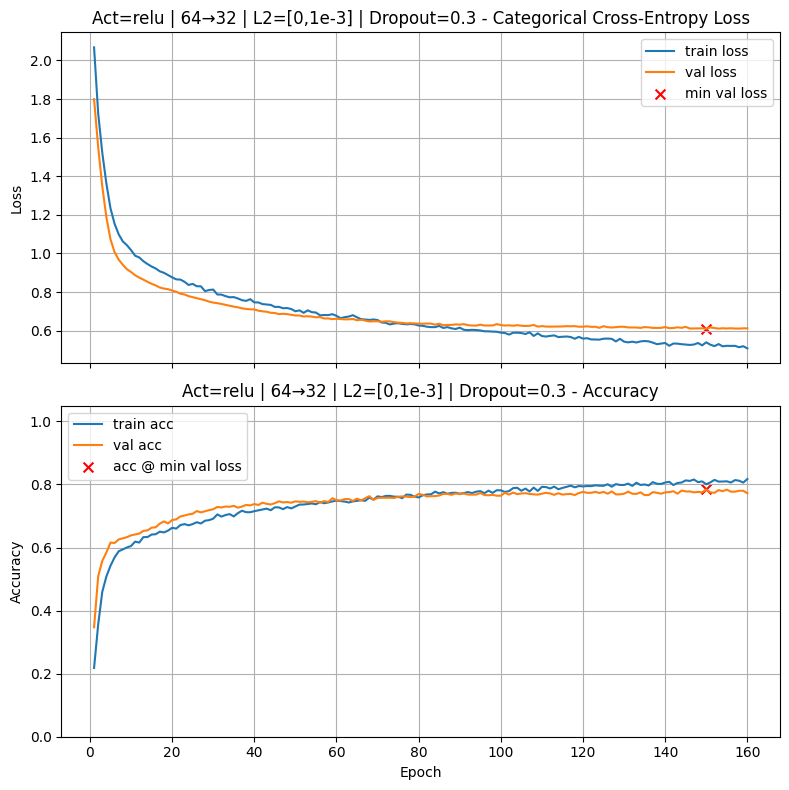

Final Training Loss:            0.5082
Final Training Accuracy:        0.8171
Final Validation Loss:          0.6120
Final Validation Accuracy:      0.7721
Minimum Validation Loss:        0.6100 (Epoch 150)
Validation Accuracy @ Min Loss: 0.7843

Test Loss: 0.6445
Test Accuracy: 0.7643

Validation-Test Gap (accuracy): 0.020000

Execution Time: 00:00:14

Act=sigmoid | 64→32 | L2=[0,1e-3] | Dropout=0.3



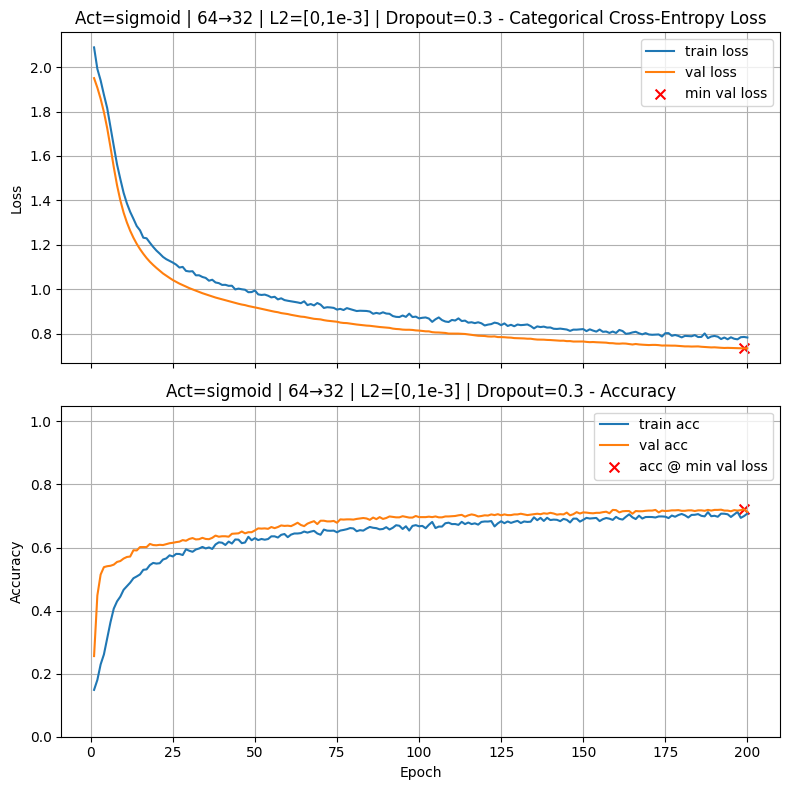

Final Training Loss:            0.7823
Final Training Accuracy:        0.7076
Final Validation Loss:          0.7337
Final Validation Accuracy:      0.7136
Minimum Validation Loss:        0.7334 (Epoch 199)
Validation Accuracy @ Min Loss: 0.7214

Test Loss: 0.7525
Test Accuracy: 0.7150

Validation-Test Gap (accuracy): 0.006429

Execution Time: 00:00:17

Act=tanh | 64→32 | L2=[0,1e-3] | Dropout=0.3



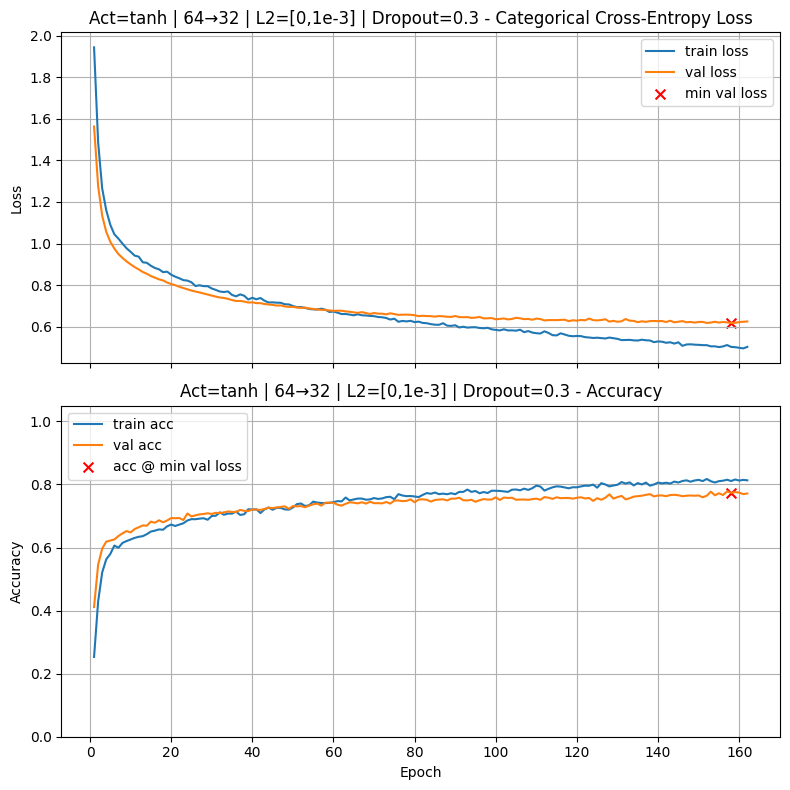

Final Training Loss:            0.5029
Final Training Accuracy:        0.8131
Final Validation Loss:          0.6250
Final Validation Accuracy:      0.7714
Minimum Validation Loss:        0.6179 (Epoch 158)
Validation Accuracy @ Min Loss: 0.7736

Test Loss: 0.6381
Test Accuracy: 0.7607

Validation-Test Gap (accuracy): 0.012857

Execution Time: 00:00:14

--- Summary (Problem 1) ---
Act=relu | 64→32 | L2=[0,1e-3] | Dropout=0.3	0.7843
Act=tanh | 64→32 | L2=[0,1e-3] | Dropout=0.3	0.7736
Act=sigmoid | 64→32 | L2=[0,1e-3] | Dropout=0.3	0.7214


In [17]:
# Your code here. Add as many cells as you need. 

activations = ["relu", "sigmoid", "tanh"]

for act in activations:
    model_baseline = build_model(
        n_inputs=X_train.shape[1],
        layer_list=[
            (64, act, 0.0,   0.0),
            (32, act, 0.001, 0.3),
        ],
        n_classes=n_classes
    )
    _ = train_and_test(
        model_baseline,
        epochs=200,
        lr_schedule=1e-3,
        optimizer="Adam",
        title=f"Act={act} | 64→32 | L2=[0,1e-3] | Dropout=0.3",
        batch_size=256,
        use_early_stopping=True,
        patience=10,
        min_delta=1e-4,
        callbacks=[],
        verbose=0,
        return_history=False
    )

print("\n--- Summary (Problem 1) ---")
print_results()

### Graded Questions

In [18]:
# Set a1a to the activation function which provided the best validation accuracy at the epoch of minimum validation loss

a1a = 0             # Replace with integer 0 (relu), 1 (sigmoid), or 2 (tanh)

In [19]:
# Graded Answer
# DO NOT change this cell in any way          

print(f'a1a = {a1a}') 


a1a = 0


In [20]:
# Set a1b to the validation accuracy found by this best activation function

a1b = 0.7843             # Replace 0.0 with your answer

In [21]:
# Graded Answer
# DO NOT change this cell in any way          

print(f'a1b = {a1b:.4f}') 

a1b = 0.7843


### Problem Two: Finding the Right Learning Rate

In this problem, you will continue working with the **baseline model** and determine which learning rate produces the best performance. As before, the model you evaluate should be the one saved by **early stopping** — the epoch where validation loss is minimized.

**Steps to follow:**

* Build and train the **baseline model** using the **activation function identified in Problem One**.

* Train and evaluate this model using each of the following learning rates:

  ```
      [1e-3, 5e-4, 1e-4, 5e-5, 1e-5]
  ```

* Identify which learning rate produces the **best validation accuracy** at the epoch of **minimum validation loss**, within a maximum of **500 epochs**.

* Answer the graded questions.


**Note: Smaller learning rates will generally take more epochs to reach the optimal point, so some of these will not engage early stopping, but run the full 500 epochs.**



LR=0.001 | ReLU | 64→32 | L2=[0,1e-3] | Dropout=0.3



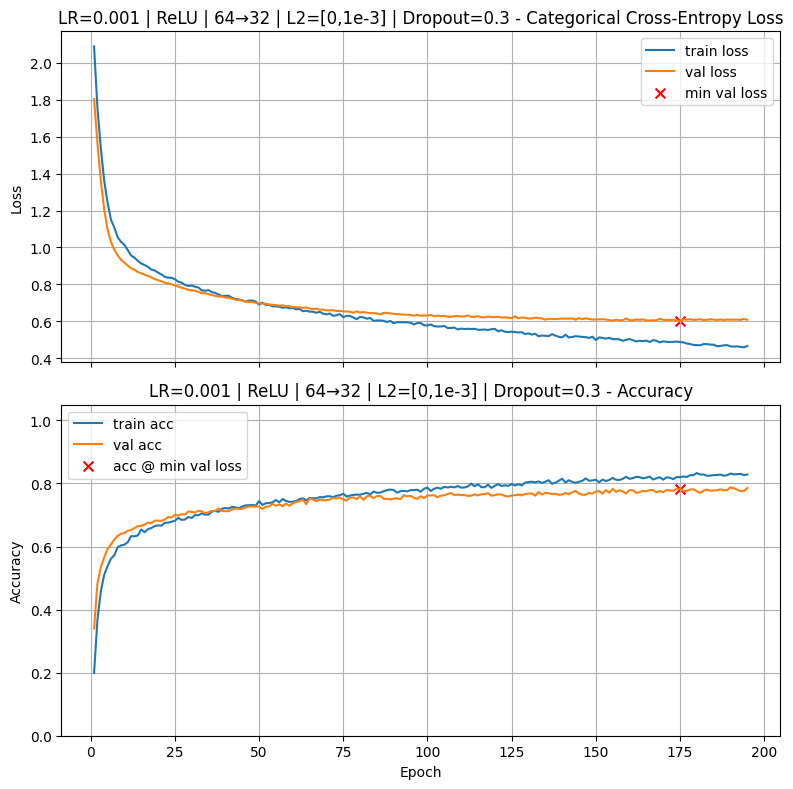

Final Training Loss:            0.4661
Final Training Accuracy:        0.8286
Final Validation Loss:          0.6085
Final Validation Accuracy:      0.7857
Minimum Validation Loss:        0.6015 (Epoch 175)
Validation Accuracy @ Min Loss: 0.7836

Test Loss: 0.6368
Test Accuracy: 0.7707

Validation-Test Gap (accuracy): 0.012857

Execution Time: 00:00:17

LR=0.0005 | ReLU | 64→32 | L2=[0,1e-3] | Dropout=0.3



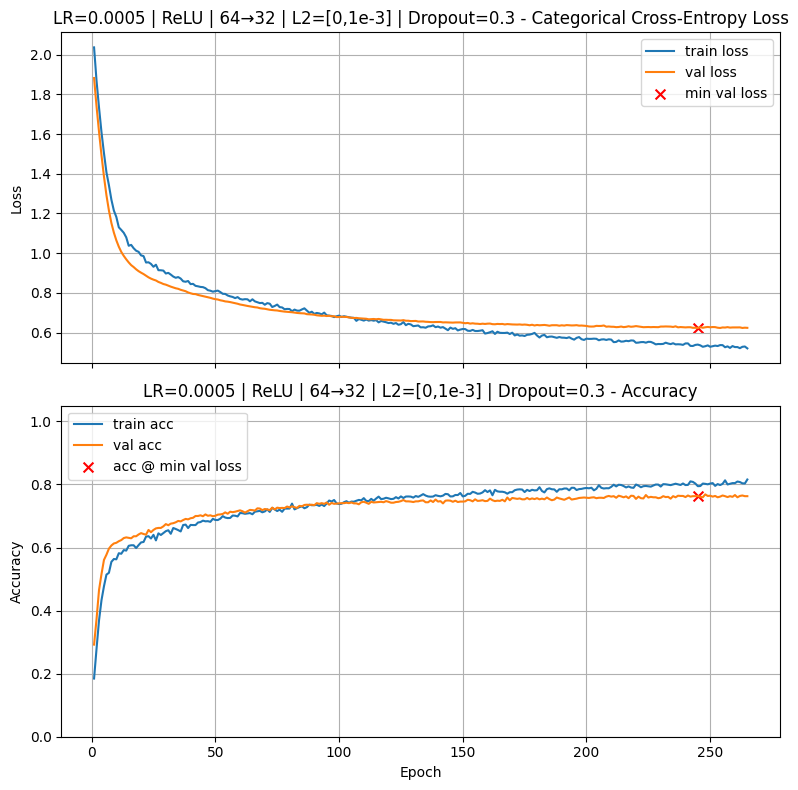

Final Training Loss:            0.5208
Final Training Accuracy:        0.8157
Final Validation Loss:          0.6242
Final Validation Accuracy:      0.7629
Minimum Validation Loss:        0.6233 (Epoch 245)
Validation Accuracy @ Min Loss: 0.7636

Test Loss: 0.6406
Test Accuracy: 0.7643

Validation-Test Gap (accuracy): 0.000714

Execution Time: 00:00:22

LR=0.0001 | ReLU | 64→32 | L2=[0,1e-3] | Dropout=0.3



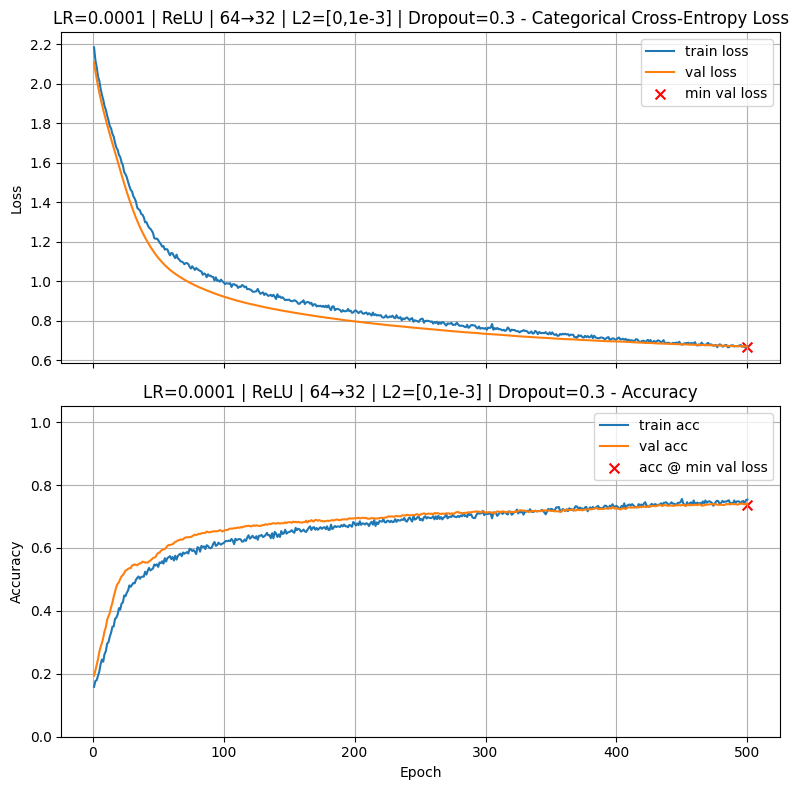

Final Training Loss:            0.6711
Final Training Accuracy:        0.7538
Final Validation Loss:          0.6687
Final Validation Accuracy:      0.7371
Minimum Validation Loss:        0.6687 (Epoch 500)
Validation Accuracy @ Min Loss: 0.7371

Test Loss: 0.6904
Test Accuracy: 0.7300

Validation-Test Gap (accuracy): 0.007143

Execution Time: 00:00:42

LR=5e-05 | ReLU | 64→32 | L2=[0,1e-3] | Dropout=0.3



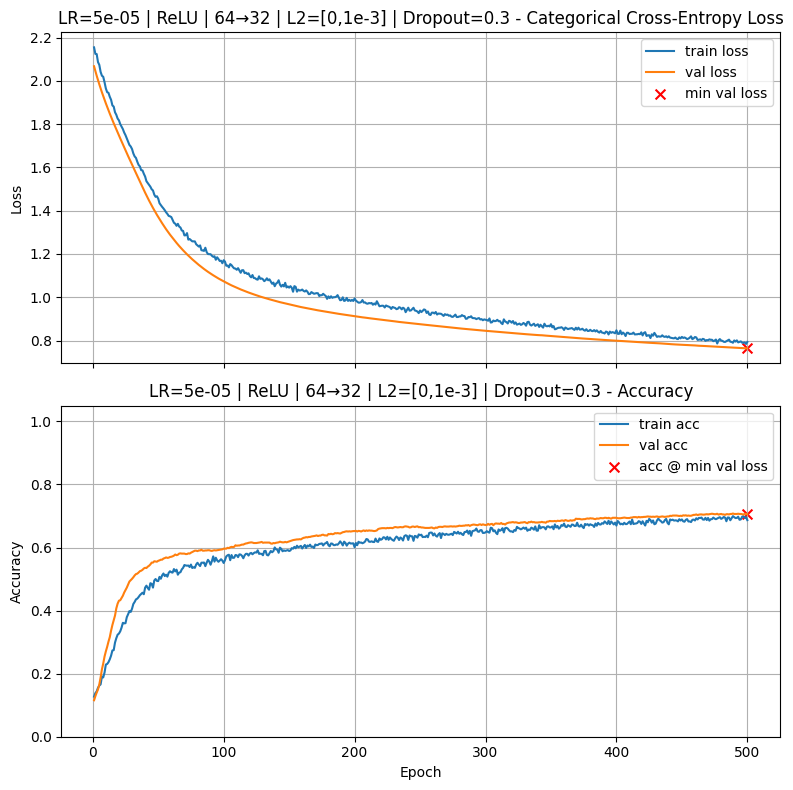

Final Training Loss:            0.7932
Final Training Accuracy:        0.6869
Final Validation Loss:          0.7636
Final Validation Accuracy:      0.7057
Minimum Validation Loss:        0.7636 (Epoch 500)
Validation Accuracy @ Min Loss: 0.7057

Test Loss: 0.7764
Test Accuracy: 0.7021

Validation-Test Gap (accuracy): 0.003571

Execution Time: 00:00:42

LR=1e-05 | ReLU | 64→32 | L2=[0,1e-3] | Dropout=0.3



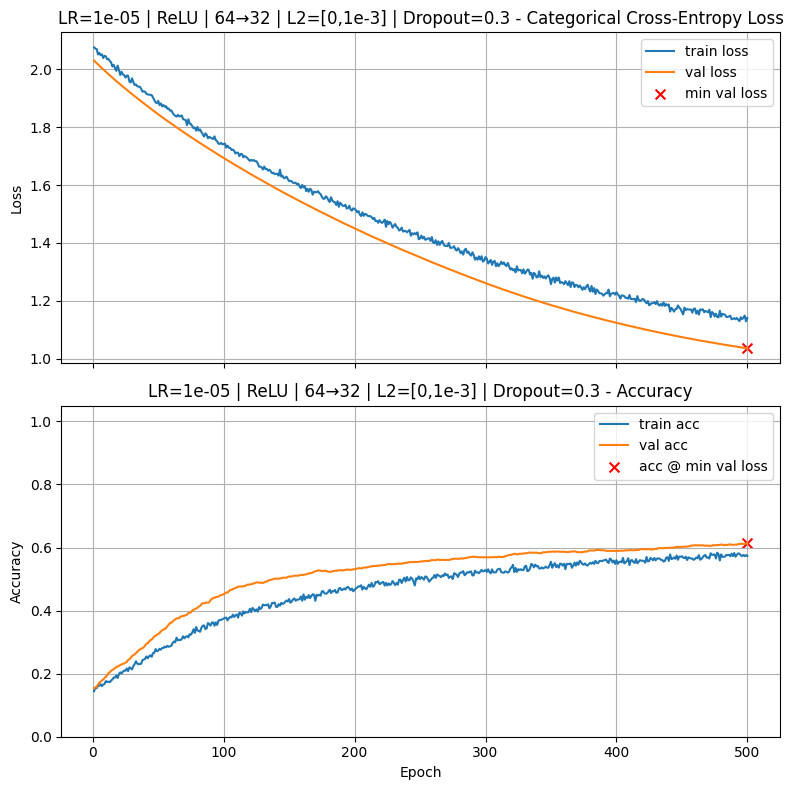

Final Training Loss:            1.1406
Final Training Accuracy:        0.5731
Final Validation Loss:          1.0357
Final Validation Accuracy:      0.6129
Minimum Validation Loss:        1.0357 (Epoch 500)
Validation Accuracy @ Min Loss: 0.6129

Test Loss: 1.0288
Test Accuracy: 0.6371

Validation-Test Gap (accuracy): 0.024286

Execution Time: 00:00:42

--- Summary (Problem 2) ---
Act=relu | 64→32 | L2=[0,1e-3] | Dropout=0.3	0.7843
LR=0.001 | ReLU | 64→32 | L2=[0,1e-3] | Dropout=0.3	0.7836
Act=tanh | 64→32 | L2=[0,1e-3] | Dropout=0.3	0.7736
LR=0.0005 | ReLU | 64→32 | L2=[0,1e-3] | Dropout=0.3	0.7636
LR=0.0001 | ReLU | 64→32 | L2=[0,1e-3] | Dropout=0.3	0.7371
Act=sigmoid | 64→32 | L2=[0,1e-3] | Dropout=0.3	0.7214
LR=5e-05 | ReLU | 64→32 | L2=[0,1e-3] | Dropout=0.3	0.7057
LR=1e-05 | ReLU | 64→32 | L2=[0,1e-3] | Dropout=0.3	0.6129


In [22]:
# Your code here. Add as many cells as you need. 

lrs = [1e-3, 5e-4, 1e-4, 5e-5, 1e-5]

for lr in lrs:
    model_lr = build_model(
        n_inputs=X_train.shape[1],
        layer_list=[
            (64, "relu", 0.0,   0.0),
            (32, "relu", 0.001, 0.3),
        ],
        n_classes=n_classes
    )
    _ = train_and_test(
        model_lr,
        epochs=500,
        lr_schedule=lr,
        optimizer="Adam",
        title=f"LR={lr:g} | ReLU | 64→32 | L2=[0,1e-3] | Dropout=0.3",
        batch_size=256,
        use_early_stopping=True,
        patience=20,
        min_delta=1e-4,
        callbacks=[],
        verbose=0,
        return_history=False
    )

print("\n--- Summary (Problem 2) ---")
print_results()

#### Graded Questions

In [23]:
# Set a2a to the learning rate which provided the best validation accuracy at the epoch of minimum validation loss

a2a = 0.001           # Replace 0.0 with your answer

In [24]:
# Graded Answer
# DO NOT change this cell in any way          

print(f'a2a = {a2a:.6f}') 

a2a = 0.001000


In [25]:
# Set a2b to the validation accuracy found by this best learning rate

a2b = 0.7836             # Replace 0.0 with your answer

In [26]:
# Graded Answer
# DO NOT change this cell in any way          

print(f'a2b = {a2b:.4f}') 

a2b = 0.7836


### Problem Three: Dropout

In this problem, you will explore how **dropout** can help prevent overfitting in neural networks. There are no absolute rules, but some useful hueristics are:

* Dropout typically works best in **later dense layers** (e.g., the second hidden layer of width 32) in the range **0.3–0.5**.
* If applied to **earlier layers** (e.g., the first hidden layer), dropout should be smaller, typically **0.0–0.2** (where 0.0 means no dropout).

**Steps to follow:**

* Build and train the **baseline model** using the **activation function from Problem One** and the **learning rate from Problem Two**.
* Investigate dropout in the ranges suggested, using increments of **0.1**.
* Identify which dropout configuration produces the **best validation accuracy** at the epoch of **minimum validation loss**.
* Answer the graded questions.



Dropout first=0.0, second=0.3 | ReLU | 64→32 | L2=[0,1e-3]



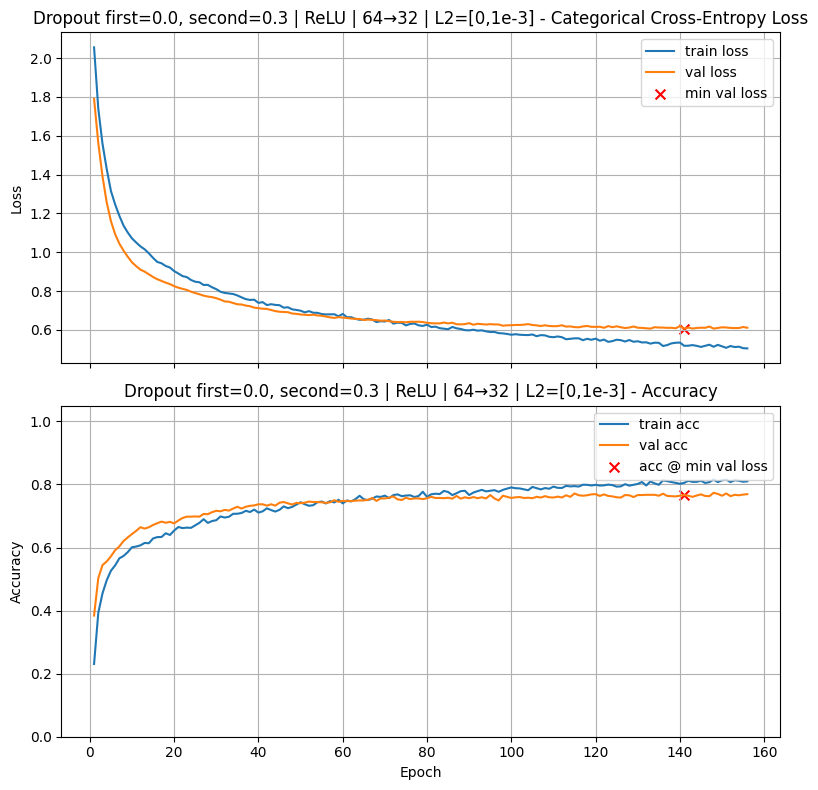

Final Training Loss:            0.5049
Final Training Accuracy:        0.8100
Final Validation Loss:          0.6112
Final Validation Accuracy:      0.7693
Minimum Validation Loss:        0.6059 (Epoch 141)
Validation Accuracy @ Min Loss: 0.7664

Test Loss: 0.6455
Test Accuracy: 0.7614

Validation-Test Gap (accuracy): 0.005000

Execution Time: 00:00:14

Dropout first=0.0, second=0.4 | ReLU | 64→32 | L2=[0,1e-3]



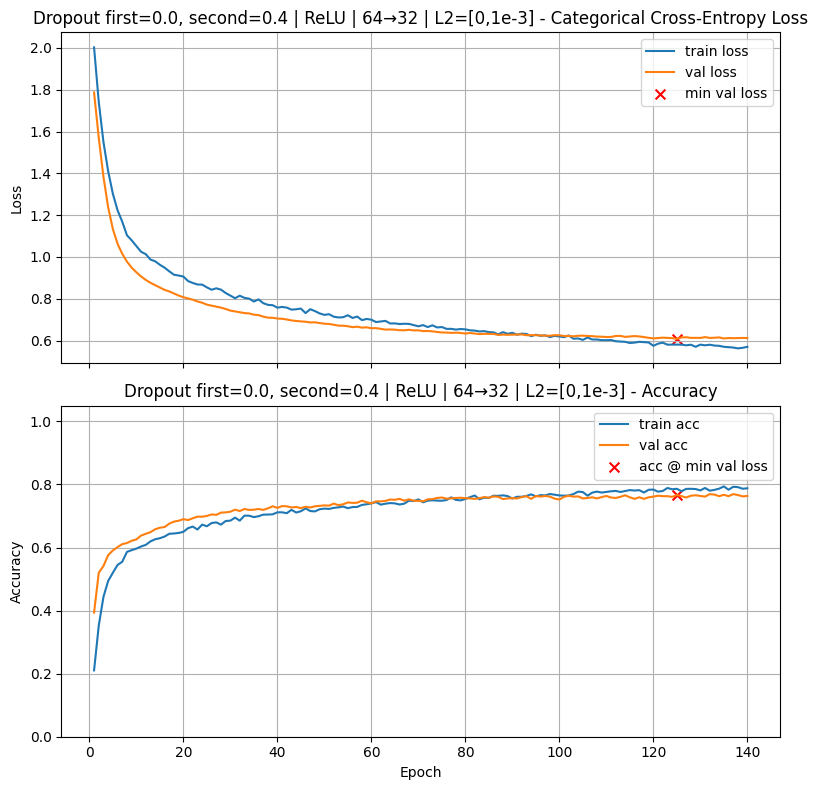

Final Training Loss:            0.5701
Final Training Accuracy:        0.7879
Final Validation Loss:          0.6120
Final Validation Accuracy:      0.7636
Minimum Validation Loss:        0.6082 (Epoch 125)
Validation Accuracy @ Min Loss: 0.7664

Test Loss: 0.6319
Test Accuracy: 0.7614

Validation-Test Gap (accuracy): 0.005000

Execution Time: 00:00:12

Dropout first=0.0, second=0.5 | ReLU | 64→32 | L2=[0,1e-3]



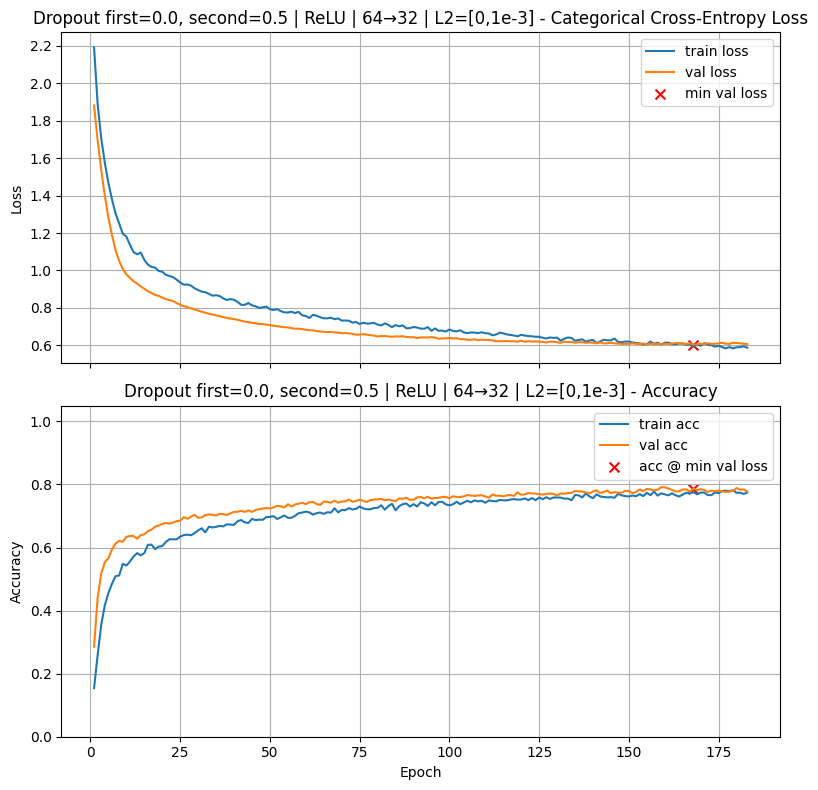

Final Training Loss:            0.5865
Final Training Accuracy:        0.7745
Final Validation Loss:          0.6057
Final Validation Accuracy:      0.7771
Minimum Validation Loss:        0.6033 (Epoch 168)
Validation Accuracy @ Min Loss: 0.7871

Test Loss: 0.6510
Test Accuracy: 0.7550

Validation-Test Gap (accuracy): 0.032143

Execution Time: 00:00:16

Dropout first=0.1, second=0.3 | ReLU | 64→32 | L2=[0,1e-3]



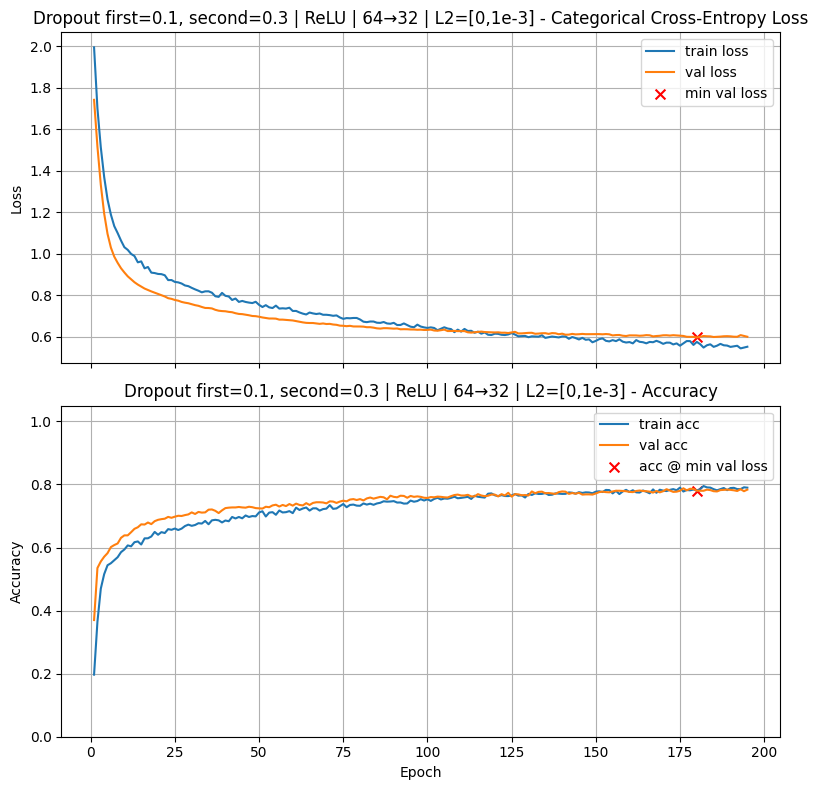

Final Training Loss:            0.5528
Final Training Accuracy:        0.7898
Final Validation Loss:          0.6009
Final Validation Accuracy:      0.7836
Minimum Validation Loss:        0.5974 (Epoch 180)
Validation Accuracy @ Min Loss: 0.7800

Test Loss: 0.6243
Test Accuracy: 0.7757

Validation-Test Gap (accuracy): 0.004286

Execution Time: 00:00:18

Dropout first=0.1, second=0.4 | ReLU | 64→32 | L2=[0,1e-3]



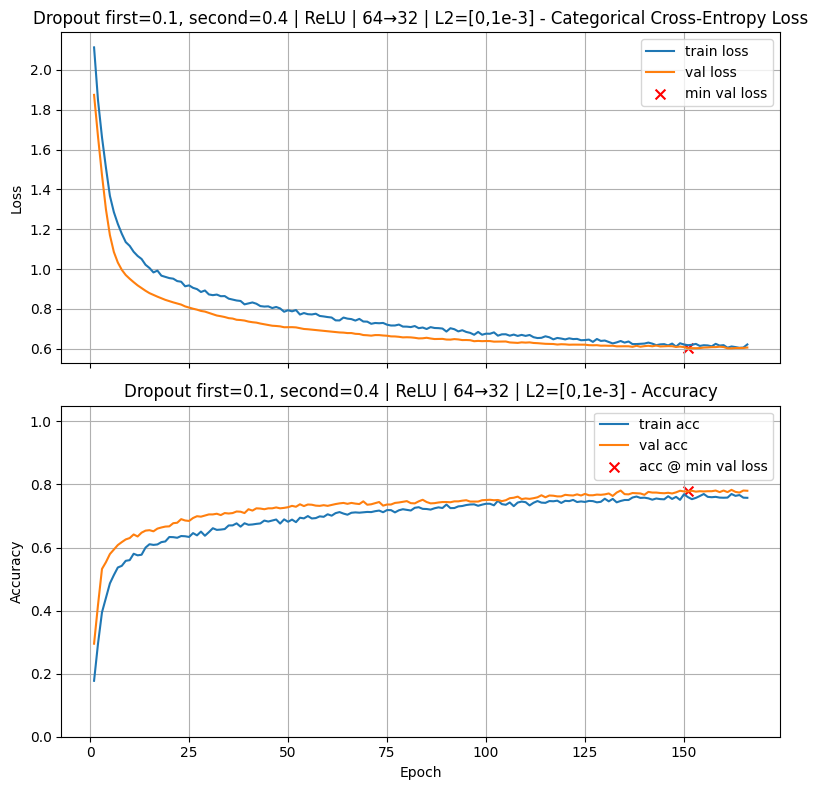

Final Training Loss:            0.6210
Final Training Accuracy:        0.7576
Final Validation Loss:          0.6054
Final Validation Accuracy:      0.7800
Minimum Validation Loss:        0.6013 (Epoch 151)
Validation Accuracy @ Min Loss: 0.7779

Test Loss: 0.6359
Test Accuracy: 0.7514

Validation-Test Gap (accuracy): 0.026429

Execution Time: 00:00:15

Dropout first=0.1, second=0.5 | ReLU | 64→32 | L2=[0,1e-3]



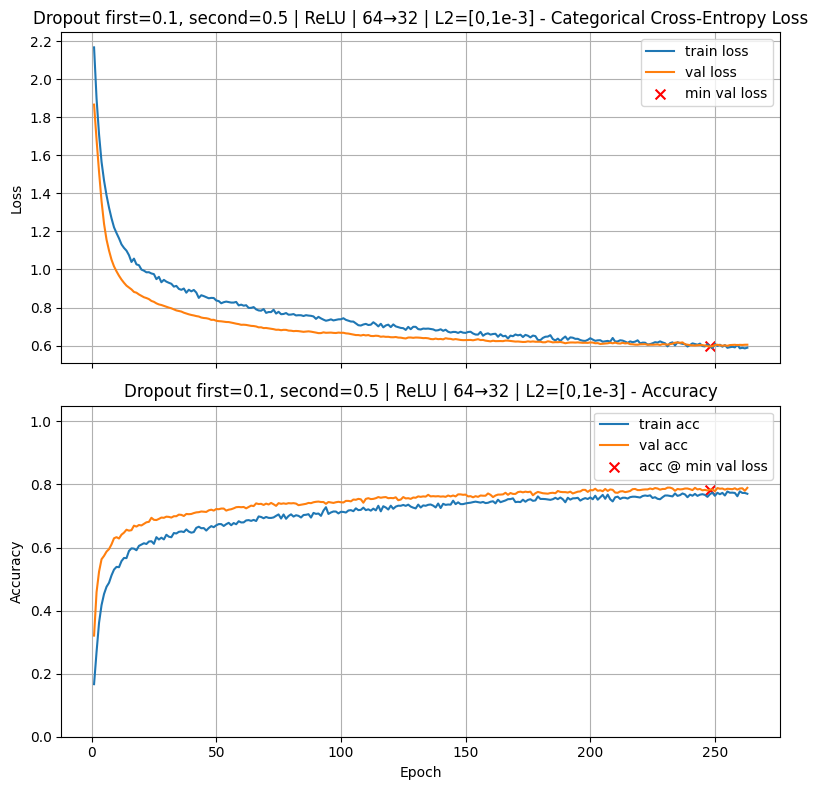

Final Training Loss:            0.5890
Final Training Accuracy:        0.7705
Final Validation Loss:          0.6046
Final Validation Accuracy:      0.7893
Minimum Validation Loss:        0.5958 (Epoch 248)
Validation Accuracy @ Min Loss: 0.7836

Test Loss: 0.6172
Test Accuracy: 0.7714

Validation-Test Gap (accuracy): 0.012143

Execution Time: 00:00:23

Dropout first=0.2, second=0.3 | ReLU | 64→32 | L2=[0,1e-3]



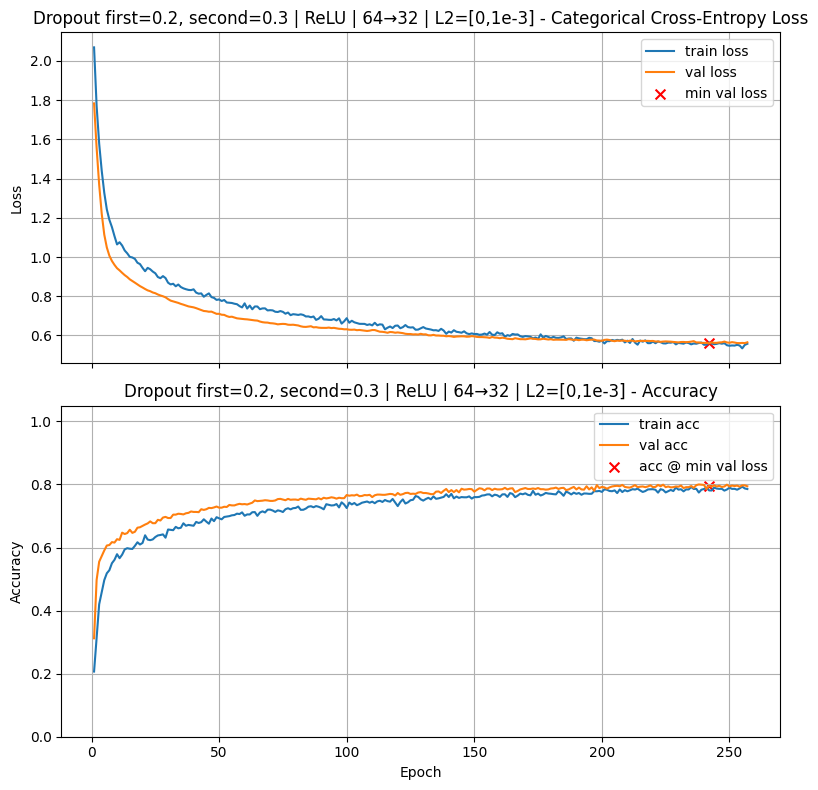

Final Training Loss:            0.5577
Final Training Accuracy:        0.7855
Final Validation Loss:          0.5652
Final Validation Accuracy:      0.7943
Minimum Validation Loss:        0.5602 (Epoch 242)
Validation Accuracy @ Min Loss: 0.7957

Test Loss: 0.5944
Test Accuracy: 0.7729

Validation-Test Gap (accuracy): 0.022857

Execution Time: 00:00:23

Dropout first=0.2, second=0.4 | ReLU | 64→32 | L2=[0,1e-3]



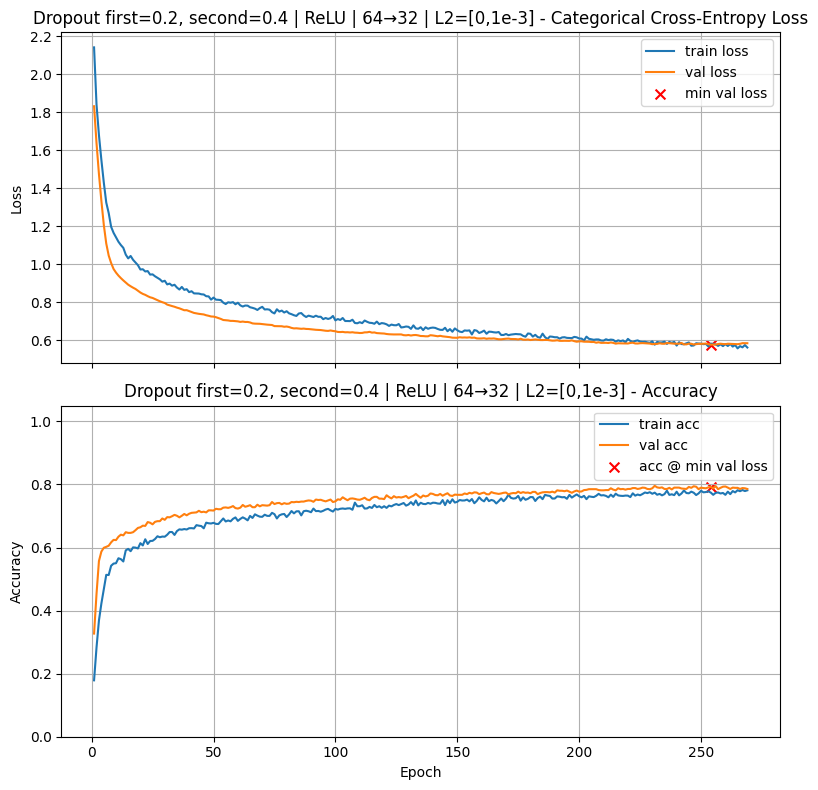

Final Training Loss:            0.5606
Final Training Accuracy:        0.7814
Final Validation Loss:          0.5832
Final Validation Accuracy:      0.7857
Minimum Validation Loss:        0.5756 (Epoch 254)
Validation Accuracy @ Min Loss: 0.7929

Test Loss: 0.6272
Test Accuracy: 0.7679

Validation-Test Gap (accuracy): 0.025000

Execution Time: 00:00:24

Dropout first=0.2, second=0.5 | ReLU | 64→32 | L2=[0,1e-3]



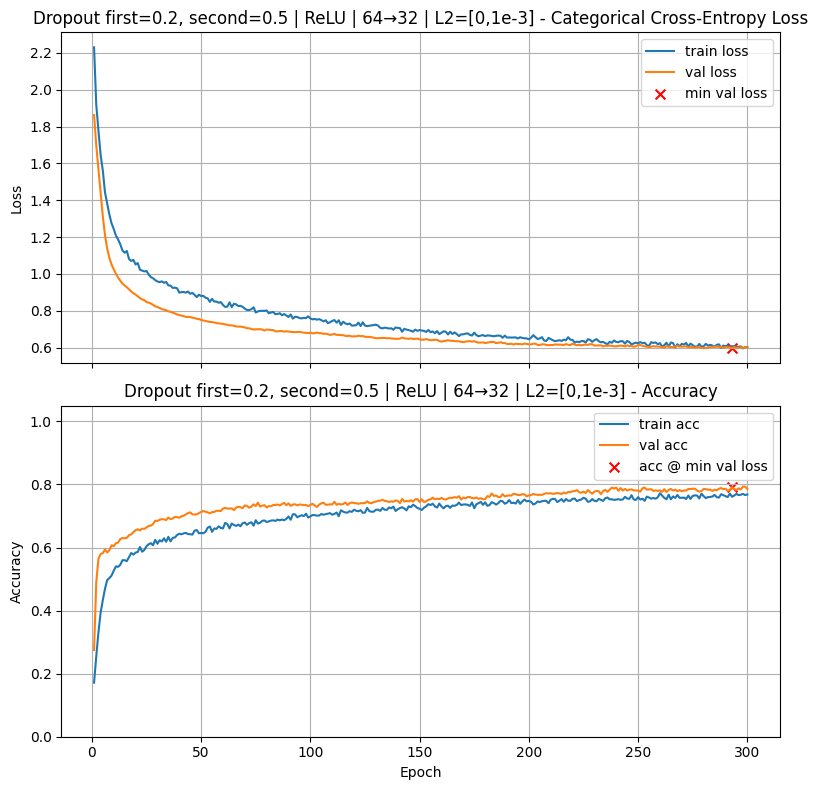

Final Training Loss:            0.6016
Final Training Accuracy:        0.7681
Final Validation Loss:          0.6002
Final Validation Accuracy:      0.7857
Minimum Validation Loss:        0.5965 (Epoch 293)
Validation Accuracy @ Min Loss: 0.7914

Test Loss: 0.6486
Test Accuracy: 0.7657

Validation-Test Gap (accuracy): 0.025714

Execution Time: 00:00:26

--- Summary (Problem 3) ---
Dropout first=0.2, second=0.3 | ReLU | 64→32 | L2=[0,1e-3]	0.7957
Dropout first=0.2, second=0.4 | ReLU | 64→32 | L2=[0,1e-3]	0.7929
Dropout first=0.2, second=0.5 | ReLU | 64→32 | L2=[0,1e-3]	0.7914
Dropout first=0.0, second=0.5 | ReLU | 64→32 | L2=[0,1e-3]	0.7871
Act=relu | 64→32 | L2=[0,1e-3] | Dropout=0.3	0.7843
LR=0.001 | ReLU | 64→32 | L2=[0,1e-3] | Dropout=0.3	0.7836
Dropout first=0.1, second=0.5 | ReLU | 64→32 | L2=[0,1e-3]	0.7836
Dropout first=0.1, second=0.3 | ReLU | 64→32 | L2=[0,1e-3]	0.7800
Dropout first=0.1, second=0.4 | ReLU | 64→32 | L2=[0,1e-3]	0.7779
Act=tanh | 64→32 | L2=[0,1e-3] | Dropout=0.

In [27]:
# Your code here. Add as many cells as you need. 

dr_first  = [0.0, 0.1, 0.2]
dr_second = [0.3, 0.4, 0.5]

for d1 in dr_first:
    for d2 in dr_second:
        model_do = build_model(
            n_inputs=X_train.shape[1],
            layer_list=[
                (64, "relu", 0.0,   d1),
                (32, "relu", 0.001, d2),
            ],
            n_classes=n_classes
        )
        _ = train_and_test(
            model_do,
            epochs=300,
            lr_schedule=1e-3,
            optimizer="Adam",
            title=f"Dropout first={d1:.1f}, second={d2:.1f} | ReLU | 64→32 | L2=[0,1e-3]",
            batch_size=256,
            use_early_stopping=True,
            patience=15,
            min_delta=1e-4,
            callbacks=[],
            verbose=0,
            return_history=False
        )

print("\n--- Summary (Problem 3) ---")
print_results()

In [28]:
# Set a3a to the pair (dropout_rate_64,dropout_rate_32) of dropout rates for the two hidden layers which provided the best 
# validation accuracy at the epoch of minimum validation loss

a3a = (0.2,0.3)             # Replace (0.0,0.0) with your answer

In [29]:
# Graded Answer
# DO NOT change this cell in any way          

print(f'a3a = {a3a}') 

a3a = (0.2, 0.3)


In [30]:
# Set a3b to the validation accuracy found by this best pair of dropout rates

a3b = 0.7957             # Replace 0.0 with your answer

In [31]:
# Graded Answer
# DO NOT change this cell in any way          

print(f'a3b = {a3b:.4f}') 

a3b = 0.7957


### Problem Four: L2 Regularization

In this problem, you will explore how **L2 regularization** (also called *weight decay*) can help prevent overfitting in neural networks. There are no absolute rules, but some useful heuristics are:

* Start simple by using the **same λ in both hidden layers**, with values:

  ```
      1e-4, 1e-3, 1e-2
  ```

* If validation results suggest underfitting in the first layer or persistent overfitting in the later one, then try adjusting per layer, for example:

  * First hidden layer: λ = 1e-4
  * Second hidden layer: λ = 1e-3

**Steps to follow:**

* Build and train the **baseline model** using the **activation function from Problem One** and the **learning rate from Problem Two**, but **without dropout**.
* Investigate at least the four cases suggested (three with the same λ and one with different λ values). You may also consider additional combinations.
* Identify which configuration produces the **best validation accuracy** at the epoch of **minimum validation loss**.
* Answer the graded questions.



L2 first=0.0001, second=0.0001 | ReLU | 64→32 | Dropout=0.0



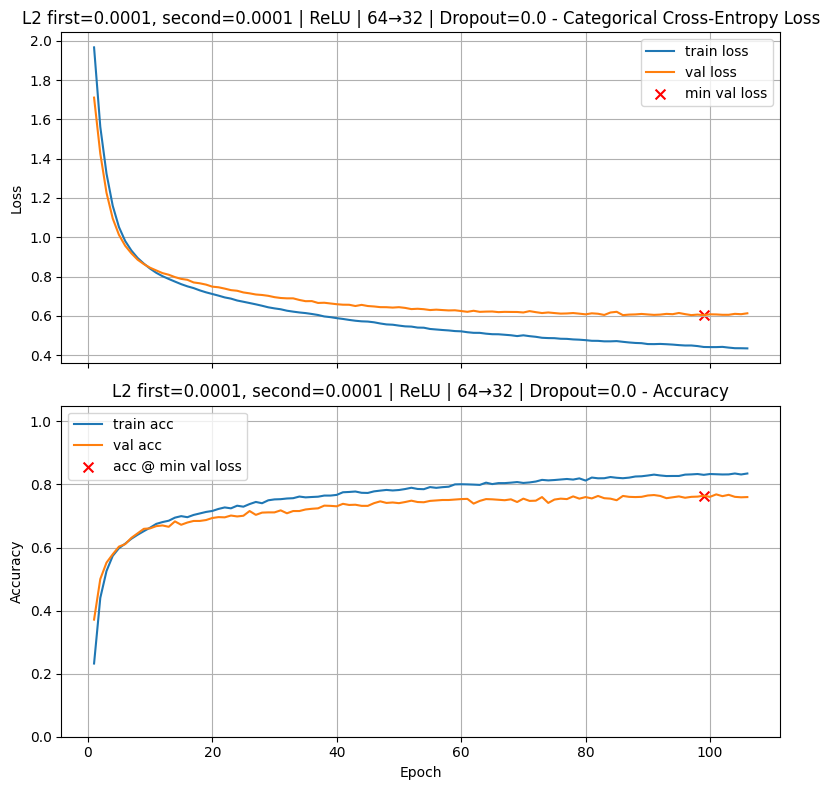

Final Training Loss:            0.4340
Final Training Accuracy:        0.8348
Final Validation Loss:          0.6126
Final Validation Accuracy:      0.7600
Minimum Validation Loss:        0.6033 (Epoch 99)
Validation Accuracy @ Min Loss: 0.7643

Test Loss: 0.6432
Test Accuracy: 0.7486

Validation-Test Gap (accuracy): 0.015714

Execution Time: 00:00:11

L2 first=0.001, second=0.001 | ReLU | 64→32 | Dropout=0.0



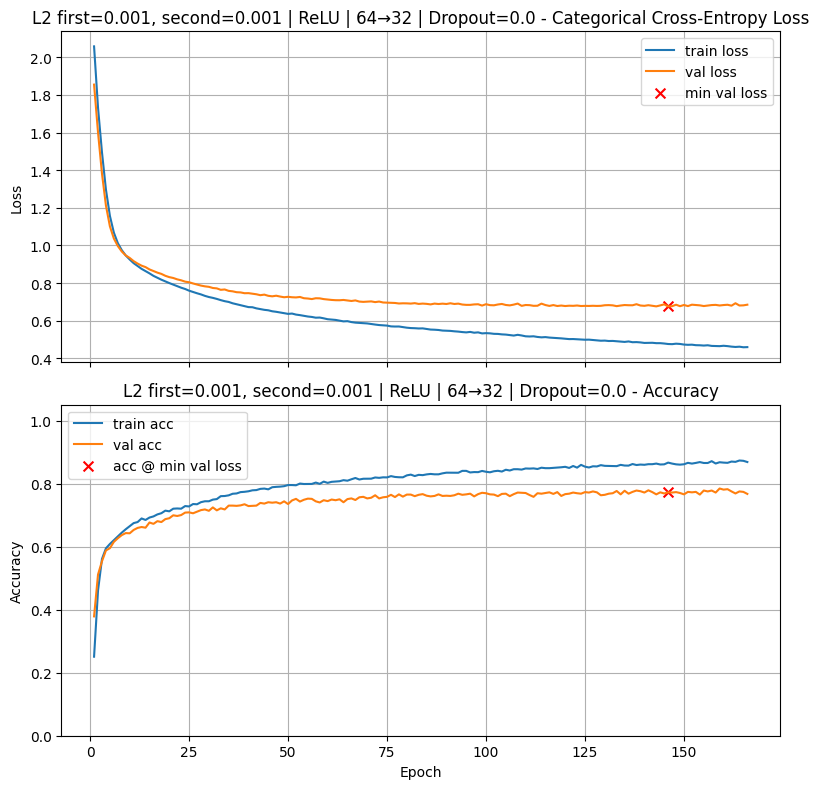

Final Training Loss:            0.4594
Final Training Accuracy:        0.8683
Final Validation Loss:          0.6849
Final Validation Accuracy:      0.7671
Minimum Validation Loss:        0.6758 (Epoch 146)
Validation Accuracy @ Min Loss: 0.7721

Test Loss: 0.6818
Test Accuracy: 0.7721

Validation-Test Gap (accuracy): 0.000000

Execution Time: 00:00:15

L2 first=0.01, second=0.01 | ReLU | 64→32 | Dropout=0.0



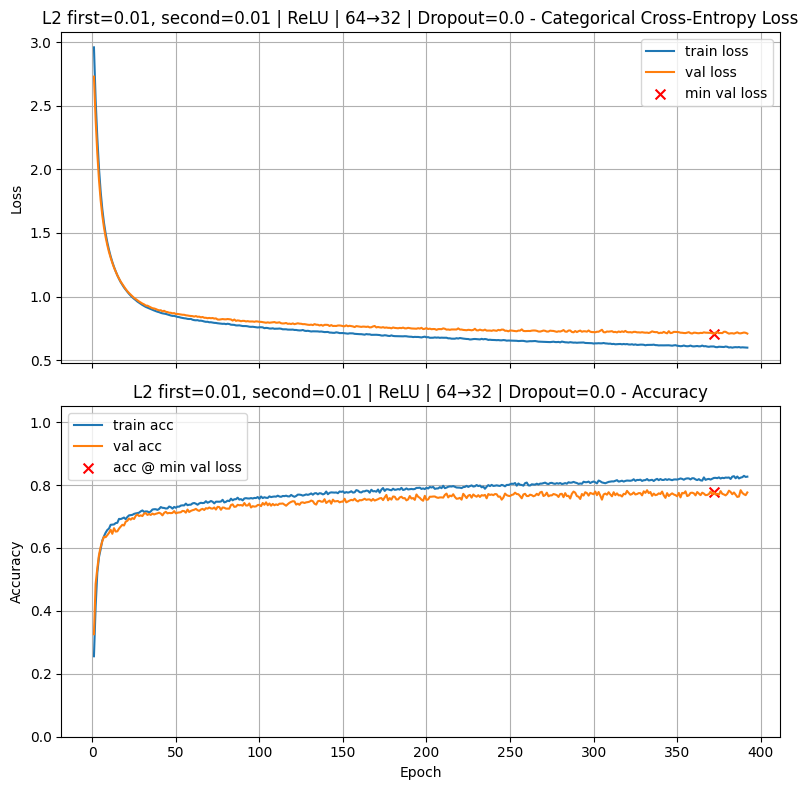

Final Training Loss:            0.5985
Final Training Accuracy:        0.8267
Final Validation Loss:          0.7091
Final Validation Accuracy:      0.7764
Minimum Validation Loss:        0.7076 (Epoch 372)
Validation Accuracy @ Min Loss: 0.7764

Test Loss: 0.7254
Test Accuracy: 0.7664

Validation-Test Gap (accuracy): 0.010000

Execution Time: 00:00:33

L2 first=0.0001, second=0.001 | ReLU | 64→32 | Dropout=0.0



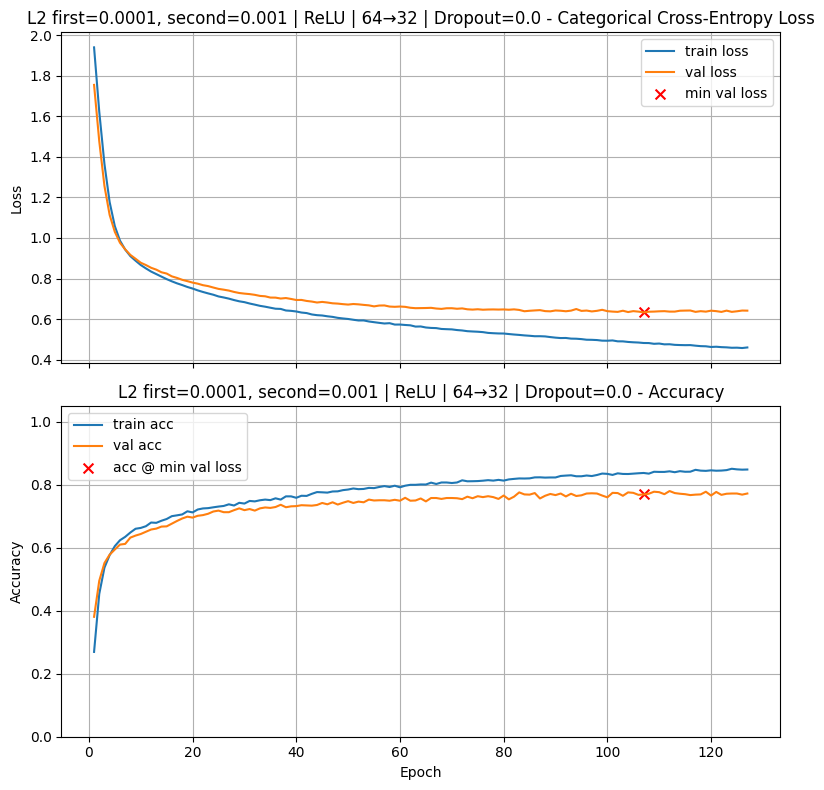

Final Training Loss:            0.4600
Final Training Accuracy:        0.8483
Final Validation Loss:          0.6415
Final Validation Accuracy:      0.7721
Minimum Validation Loss:        0.6329 (Epoch 107)
Validation Accuracy @ Min Loss: 0.7693

Test Loss: 0.6551
Test Accuracy: 0.7600

Validation-Test Gap (accuracy): 0.009286

Execution Time: 00:00:12

--- Summary (Problem 4) ---
Dropout first=0.2, second=0.3 | ReLU | 64→32 | L2=[0,1e-3]	0.7957
Dropout first=0.2, second=0.4 | ReLU | 64→32 | L2=[0,1e-3]	0.7929
Dropout first=0.2, second=0.5 | ReLU | 64→32 | L2=[0,1e-3]	0.7914
Dropout first=0.0, second=0.5 | ReLU | 64→32 | L2=[0,1e-3]	0.7871
Act=relu | 64→32 | L2=[0,1e-3] | Dropout=0.3	0.7843
LR=0.001 | ReLU | 64→32 | L2=[0,1e-3] | Dropout=0.3	0.7836
Dropout first=0.1, second=0.5 | ReLU | 64→32 | L2=[0,1e-3]	0.7836
Dropout first=0.1, second=0.3 | ReLU | 64→32 | L2=[0,1e-3]	0.7800
Dropout first=0.1, second=0.4 | ReLU | 64→32 | L2=[0,1e-3]	0.7779
L2 first=0.01, second=0.01 | ReLU | 64→32 |

In [32]:
# Your code here. Add as many cells as you need. 

pairs = [
    (1e-4, 1e-4),
    (1e-3, 1e-3),
    (1e-2, 1e-2),
    (1e-4, 1e-3),
]

for l2_1, l2_2 in pairs:
    model_l2 = build_model(
        n_inputs=X_train.shape[1],
        layer_list=[
            (64, "relu", l2_1, 0.0),
            (32, "relu", l2_2, 0.0),
        ],
        n_classes=n_classes
    )
    _ = train_and_test(
        model_l2,
        epochs=400,
        lr_schedule=1e-3,
        optimizer="Adam",
        title=f"L2 first={l2_1:g}, second={l2_2:g} | ReLU | 64→32 | Dropout=0.0",
        batch_size=256,
        use_early_stopping=True,
        patience=20,
        min_delta=1e-4,
        callbacks=[],
        verbose=0,
        return_history=False
    )

print("\n--- Summary (Problem 4) ---")
print_results()

In [33]:
# Set a4a to the pair (L2_lambda_64,L2_lambda_32) of the L2 lambdas for the two hidden layers which provided the best 
# validation accuracy at the epoch of minimum validation loss

a4a = (0.01,0.01)             # Replace (0.0,0.0) with your answer

In [34]:
# Graded Answer
# DO NOT change this cell in any way          

print(f'a4a = {a4a}') 

a4a = (0.01, 0.01)


In [35]:
# Set a4b to the validation accuracy found by this best pair of lambdas

a4b = 0.7764             # Replace 0.0 with your answer

In [36]:
# Graded Answer
# DO NOT change this cell in any way          

print(f'a4b = {a4b:.4f}') 

a4b = 0.7764


### Problem Five: Combining Dropout with L2 Regularization

In this problem, you will explore how **dropout** and **L2 regularization** can work together to prevent overfitting. These two methods complement each other, but must be balanced carefully. A useful rule of thumb is:

* If dropout is **high**, use a **smaller λ**.
* If dropout is **low**, you can afford a **larger λ**.

**Steps to follow:**

* Build and train the **baseline model** using the **activation function from Problem One** and the **learning rate from Problem Two**.
* Investigate combinations of dropout and L2:

  * First, use the **dropout rate you identified in Problem Three** as a baseline.
  * Then, add L2 to both hidden layers with values:

    ```
        1e-4, 1e-3, 1e-2
    ```

    while keeping dropout fixed.
  * Finally, try **reducing dropout slightly** when L2 is added to see if performance improves.
  * [Optional] You may wish to investigate other combinations not covered here; for example, promising but not optimal choices of dropout rates may provide overall better performance when combines with L2 Regulari 
* Identify which combination produces the **best validation accuracy** at the epoch of **minimum validation loss**.
* Answer the graded questions.




DO=(0.2,0.3), L2=(0,0) | ReLU | 64→32



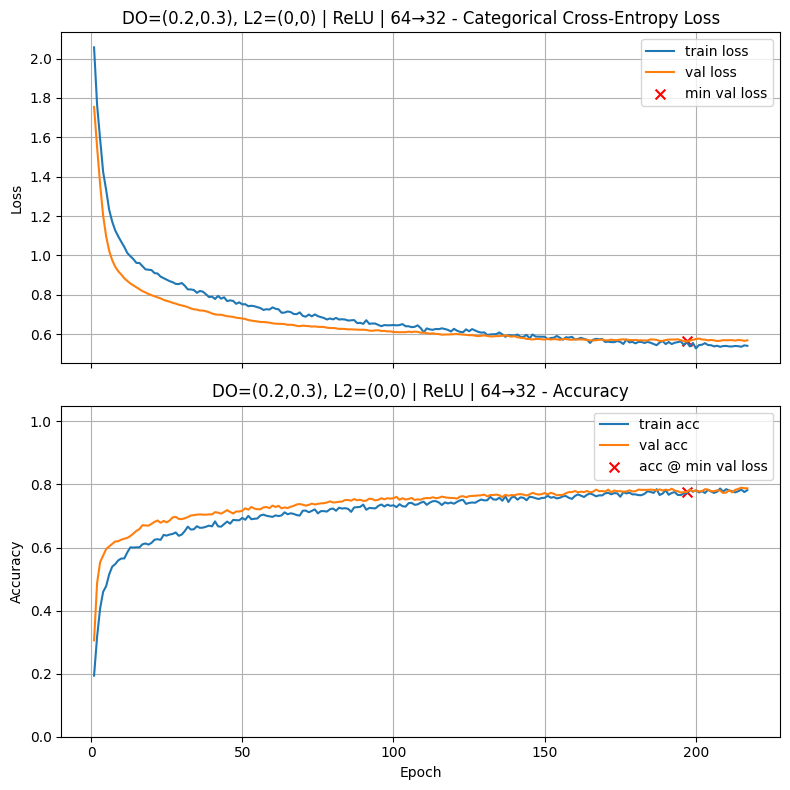

Final Training Loss:            0.5410
Final Training Accuracy:        0.7819
Final Validation Loss:          0.5689
Final Validation Accuracy:      0.7879
Minimum Validation Loss:        0.5633 (Epoch 197)
Validation Accuracy @ Min Loss: 0.7764

Test Loss: 0.5984
Test Accuracy: 0.7686

Validation-Test Gap (accuracy): 0.007857

Execution Time: 00:00:21

DO=(0.2,0.3), L2=(0.0001,0.0001) | ReLU | 64→32



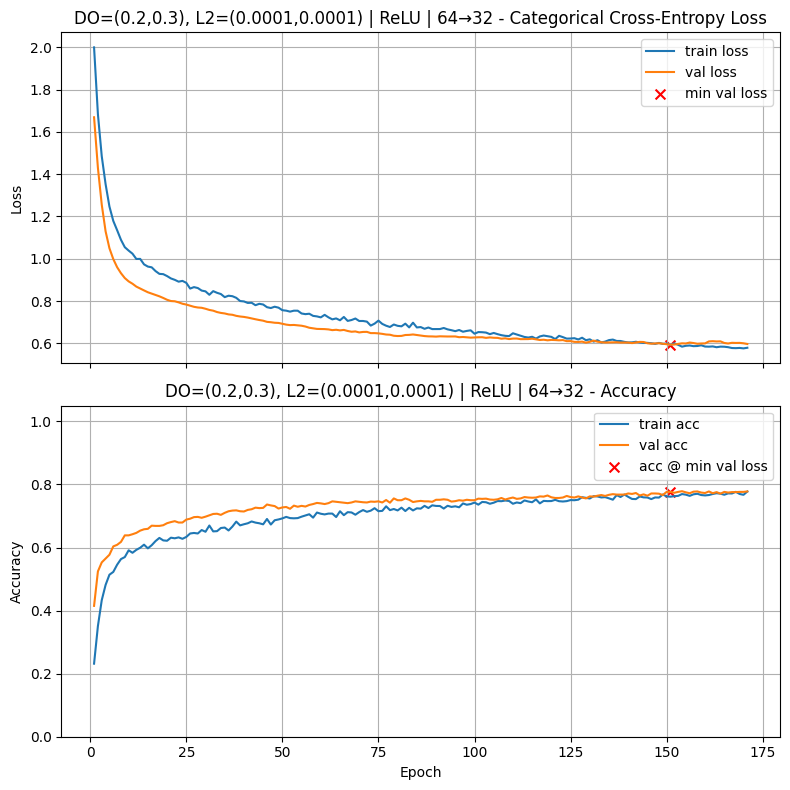

Final Training Loss:            0.5787
Final Training Accuracy:        0.7776
Final Validation Loss:          0.5967
Final Validation Accuracy:      0.7779
Minimum Validation Loss:        0.5931 (Epoch 151)
Validation Accuracy @ Min Loss: 0.7764

Test Loss: 0.6204
Test Accuracy: 0.7443

Validation-Test Gap (accuracy): 0.032143

Execution Time: 00:00:16

DO=(0.2,0.3), L2=(0.001,0.001) | ReLU | 64→32



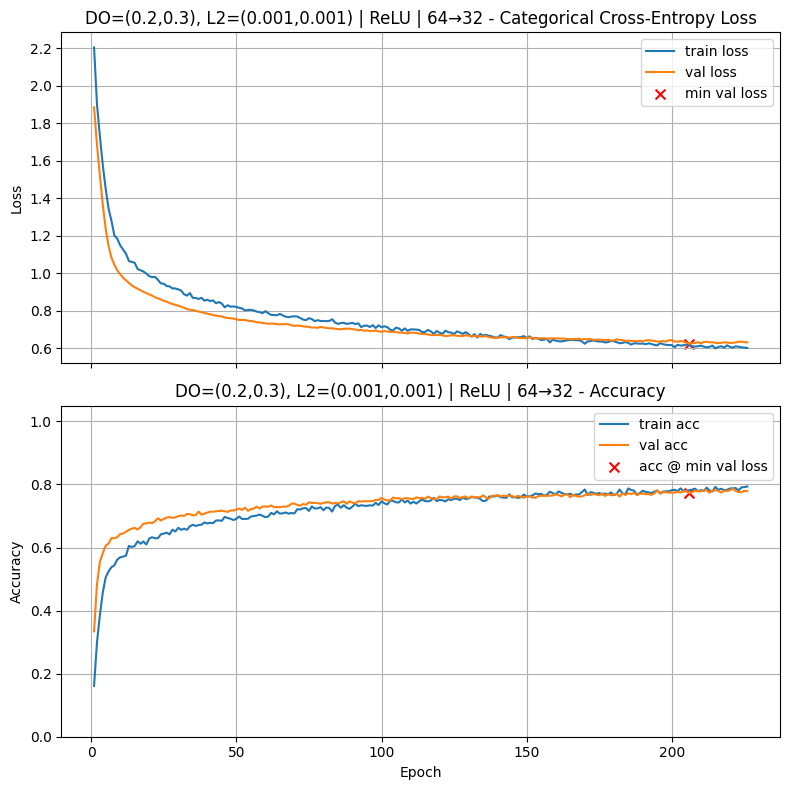

Final Training Loss:            0.6012
Final Training Accuracy:        0.7936
Final Validation Loss:          0.6313
Final Validation Accuracy:      0.7786
Minimum Validation Loss:        0.6244 (Epoch 206)
Validation Accuracy @ Min Loss: 0.7721

Test Loss: 0.6517
Test Accuracy: 0.7693

Validation-Test Gap (accuracy): 0.002857

Execution Time: 00:00:21

DO=(0.2,0.3), L2=(0.01,0.01) | ReLU | 64→32



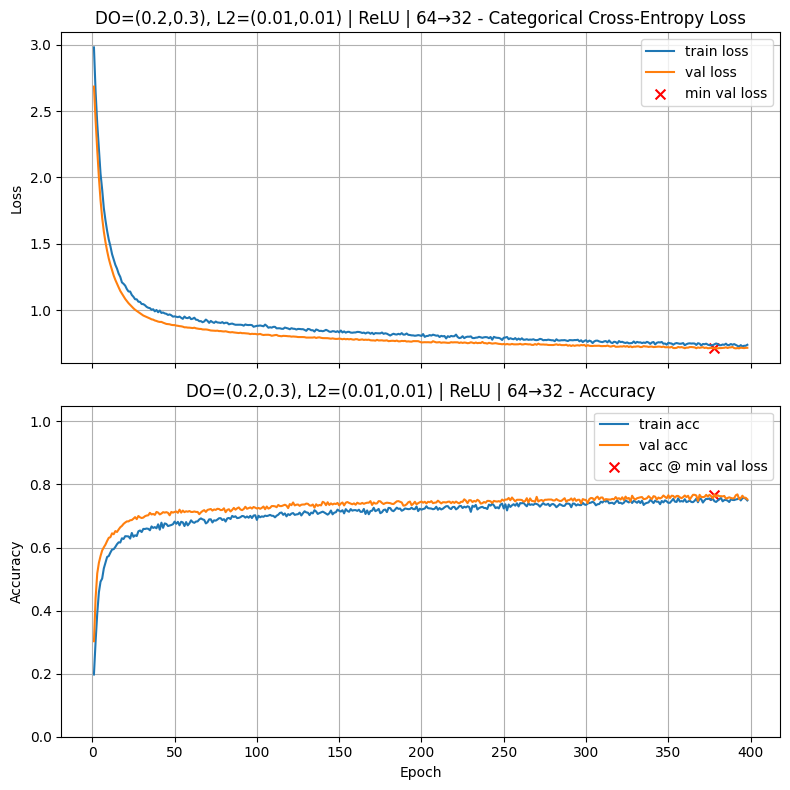

Final Training Loss:            0.7397
Final Training Accuracy:        0.7493
Final Validation Loss:          0.7172
Final Validation Accuracy:      0.7529
Minimum Validation Loss:        0.7127 (Epoch 378)
Validation Accuracy @ Min Loss: 0.7679

Test Loss: 0.7396
Test Accuracy: 0.7536

Validation-Test Gap (accuracy): 0.014286

Execution Time: 00:00:37

DO=(0.1,0.2), L2=(0.0001,0.0001) | ReLU | 64→32



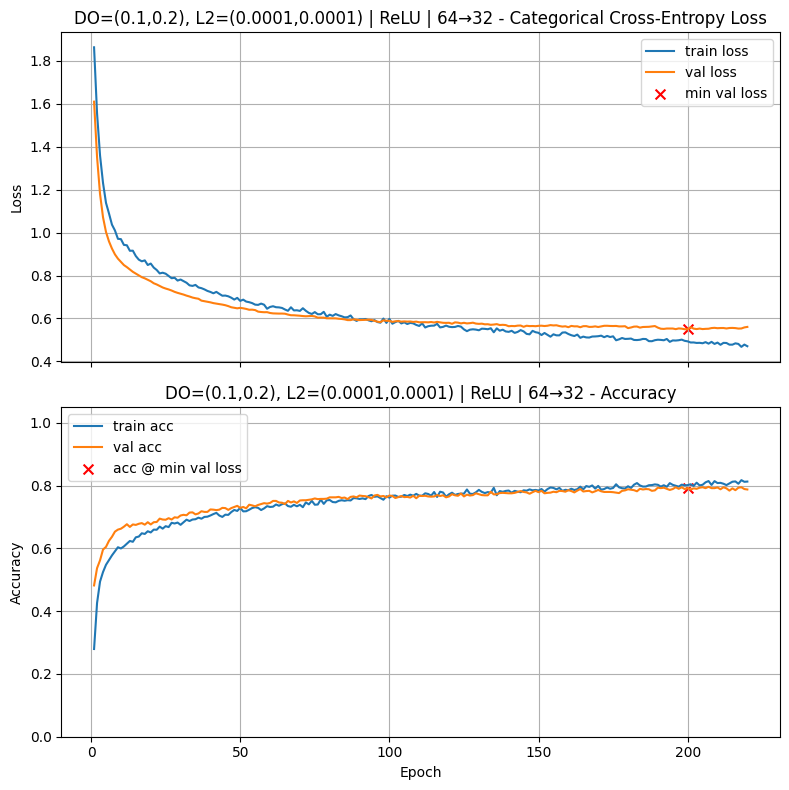

Final Training Loss:            0.4704
Final Training Accuracy:        0.8131
Final Validation Loss:          0.5604
Final Validation Accuracy:      0.7879
Minimum Validation Loss:        0.5492 (Epoch 200)
Validation Accuracy @ Min Loss: 0.7921

Test Loss: 0.5856
Test Accuracy: 0.7729

Validation-Test Gap (accuracy): 0.019286

Execution Time: 00:00:21

DO=(0.1,0.2), L2=(0.001,0.001) | ReLU | 64→32



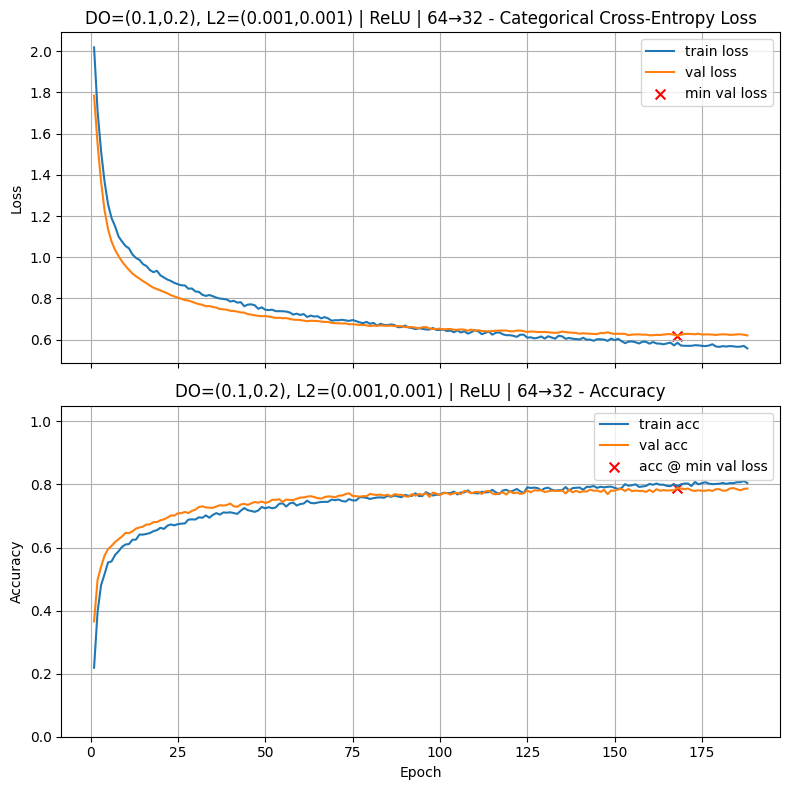

Final Training Loss:            0.5575
Final Training Accuracy:        0.8043
Final Validation Loss:          0.6206
Final Validation Accuracy:      0.7871
Minimum Validation Loss:        0.6182 (Epoch 168)
Validation Accuracy @ Min Loss: 0.7886

Test Loss: 0.6476
Test Accuracy: 0.7721

Validation-Test Gap (accuracy): 0.016429

Execution Time: 00:00:18

DO=(0.1,0.3), L2=(0.0001,0.0001) | ReLU | 64→32



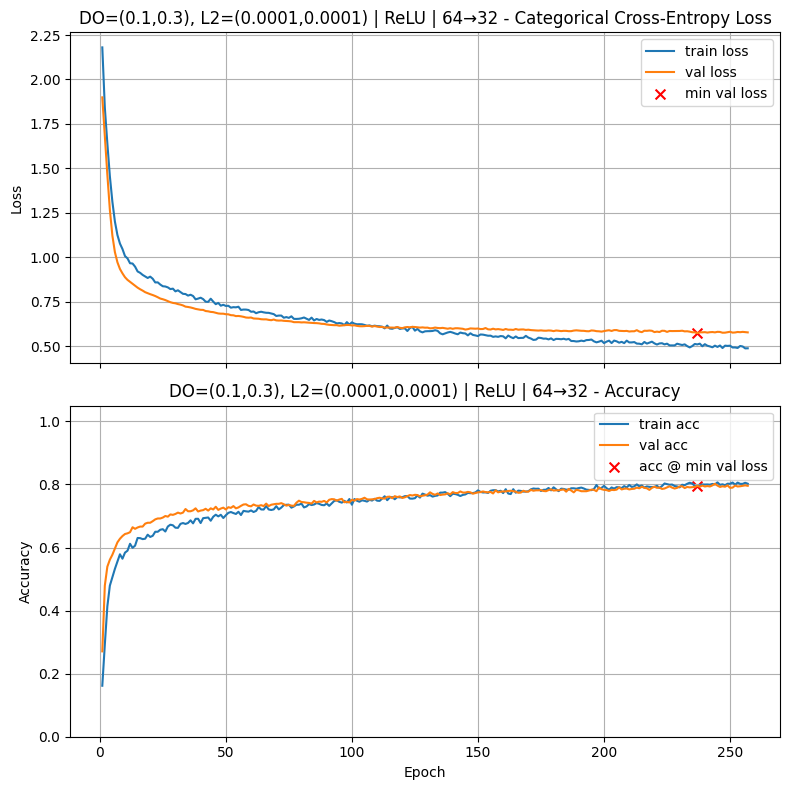

Final Training Loss:            0.4873
Final Training Accuracy:        0.8024
Final Validation Loss:          0.5769
Final Validation Accuracy:      0.7957
Minimum Validation Loss:        0.5728 (Epoch 237)
Validation Accuracy @ Min Loss: 0.7957

Test Loss: 0.6048
Test Accuracy: 0.7764

Validation-Test Gap (accuracy): 0.019286

Execution Time: 00:00:24

DO=(0.1,0.3), L2=(0.001,0.001) | ReLU | 64→32



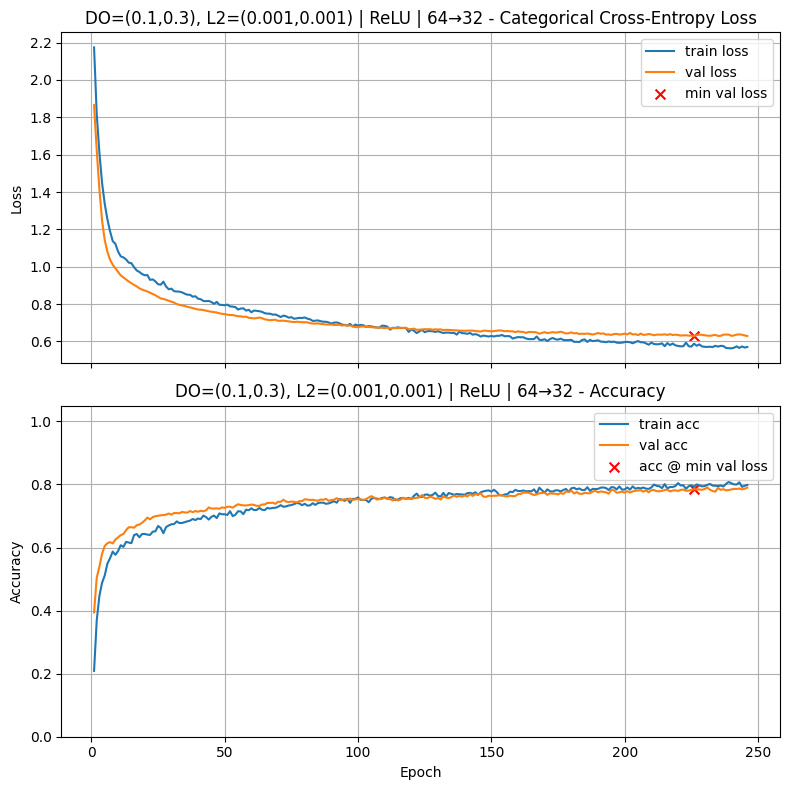

Final Training Loss:            0.5705
Final Training Accuracy:        0.7986
Final Validation Loss:          0.6292
Final Validation Accuracy:      0.7900
Minimum Validation Loss:        0.6285 (Epoch 226)
Validation Accuracy @ Min Loss: 0.7850

Test Loss: 0.6415
Test Accuracy: 0.7657

Validation-Test Gap (accuracy): 0.019286

Execution Time: 00:00:23

DO=(0.2,0.2), L2=(0.0001,0.0001) | ReLU | 64→32



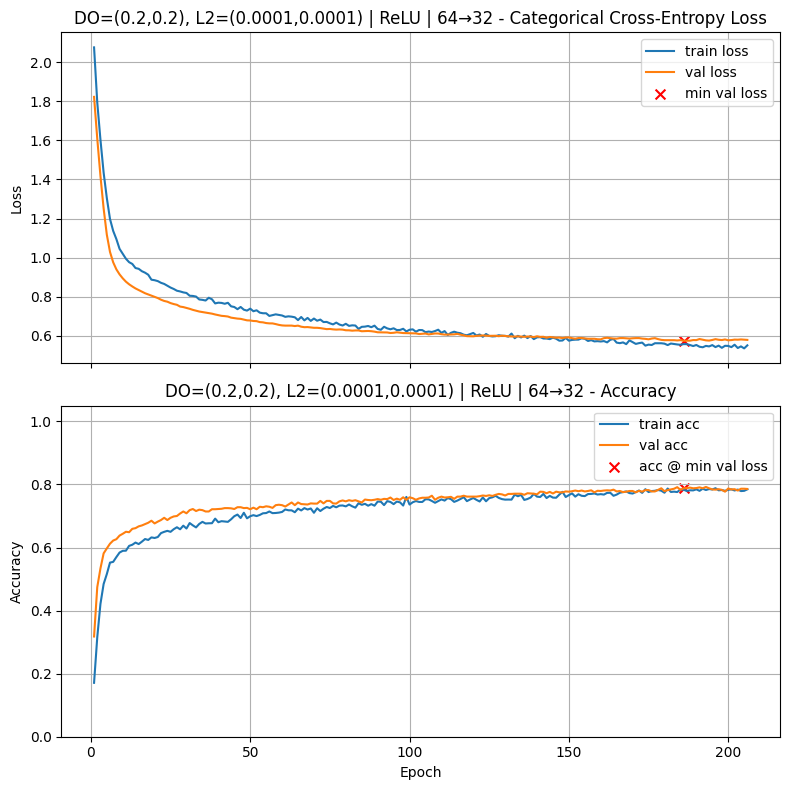

Final Training Loss:            0.5509
Final Training Accuracy:        0.7845
Final Validation Loss:          0.5789
Final Validation Accuracy:      0.7857
Minimum Validation Loss:        0.5746 (Epoch 186)
Validation Accuracy @ Min Loss: 0.7879

Test Loss: 0.6148
Test Accuracy: 0.7629

Validation-Test Gap (accuracy): 0.025000

Execution Time: 00:00:19

DO=(0.2,0.2), L2=(0.001,0.001) | ReLU | 64→32



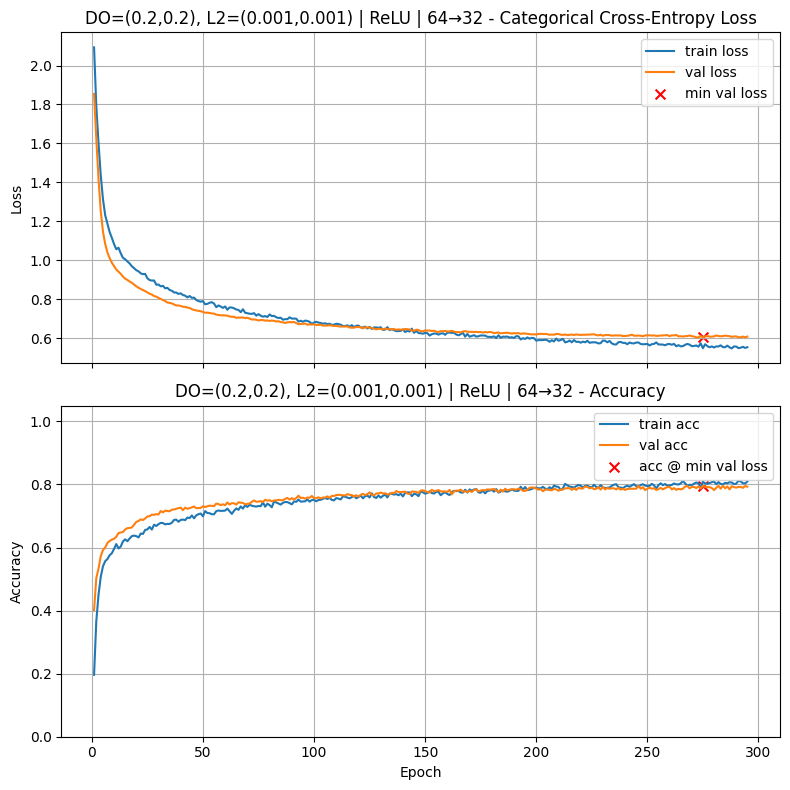

Final Training Loss:            0.5530
Final Training Accuracy:        0.8093
Final Validation Loss:          0.6077
Final Validation Accuracy:      0.7929
Minimum Validation Loss:        0.6034 (Epoch 275)
Validation Accuracy @ Min Loss: 0.7950

Test Loss: 0.6396
Test Accuracy: 0.7736

Validation-Test Gap (accuracy): 0.021429

Execution Time: 00:00:27

--- Summary (Problem 5) ---
Dropout first=0.2, second=0.3 | ReLU | 64→32 | L2=[0,1e-3]	0.7957
DO=(0.1,0.3), L2=(0.0001,0.0001) | ReLU | 64→32	0.7957
DO=(0.2,0.2), L2=(0.001,0.001) | ReLU | 64→32	0.7950
Dropout first=0.2, second=0.4 | ReLU | 64→32 | L2=[0,1e-3]	0.7929
DO=(0.1,0.2), L2=(0.0001,0.0001) | ReLU | 64→32	0.7921
Dropout first=0.2, second=0.5 | ReLU | 64→32 | L2=[0,1e-3]	0.7914
DO=(0.1,0.2), L2=(0.001,0.001) | ReLU | 64→32	0.7886
DO=(0.2,0.2), L2=(0.0001,0.0001) | ReLU | 64→32	0.7879
Dropout first=0.0, second=0.5 | ReLU | 64→32 | L2=[0,1e-3]	0.7871
DO=(0.1,0.3), L2=(0.001,0.001) | ReLU | 64→32	0.7850
Act=relu | 64→32 | L2=[0,1e-

In [37]:
# Your code here. Add as many cells as you need.

best_d1, best_d2 = 0.2, 0.3
shared_l2s = [1e-4, 1e-3, 1e-2]

configs = [("DO=(0.2,0.3), L2=(0,0)", (best_d1, best_d2), (0.0, 0.0))]

for lam in shared_l2s:
    configs.append((f"DO=(0.2,0.3), L2=({lam:g},{lam:g})", (best_d1, best_d2), (lam, lam)))

reduced_dropouts = [(0.1, 0.2), (0.1, 0.3), (0.2, 0.2)]
reduced_l2s = [1e-4, 1e-3]
for d1, d2 in reduced_dropouts:
    for lam in reduced_l2s:
        configs.append((f"DO=({d1:.1f},{d2:.1f}), L2=({lam:g},{lam:g})", (d1, d2), (lam, lam)))

for title, (d1, d2), (l21, l22) in configs:
    model_combo = build_model(
        n_inputs=X_train.shape[1],
        layer_list=[
            (64, "relu", l21, d1),
            (32, "relu", l22, d2),
        ],
        n_classes=n_classes
    )
    _ = train_and_test(
        model_combo,
        epochs=400,
        lr_schedule=1e-3,
        optimizer="Adam",
        title=f"{title} | ReLU | 64→32",
        batch_size=256,
        use_early_stopping=True,
        patience=20,
        min_delta=1e-4,
        callbacks=[],
        verbose=0,
        return_history=False
    )

print("\n--- Summary (Problem 5) ---")
print_results()

In [38]:
# Set a5 to the validation accuracy found by this best combination of dropout and L2 regularization

a5 = 0.7957             # Replace 0.0 with your answer

In [39]:
# Graded Answer
# DO NOT change this cell in any way          

print(f'a5 = {a5:.4f}') 

a5 = 0.7957


### Problem Six: Build and Train Your Best Model

In this final problem, you will design and train your **best-performing model** using the techniques explored in the previous problems. You may make your own choices for:

* **Model architecture** (number of layers, widths, etc.)
* **Learning rate**
* **Batch size** (a new hyperparameter not varied in earlier problems)
* **Dropout rates** in both layers
* **L2 λ values** in both layers
* **[Optional but strongly suggested]:** Learning rate scheduling, using either **Exponential Decay** or **Cosine Decay**.

  * For Exponential Decay, typical decay rates are **0.90–0.999**, with **0.95** often a good starting point.

**Steps to follow:**

* Build and train the model according to your design choices.
* Use early stopping as before to evaluate performance at the epoch of **minimum validation loss**.
* Answer the graded question.



BestModel: 128-64-32 ReLU | DO=(0.1,0.3,0.3) | L2=1e-4 each | Adam+ExpDecay(0.95/20eps) | bs=256



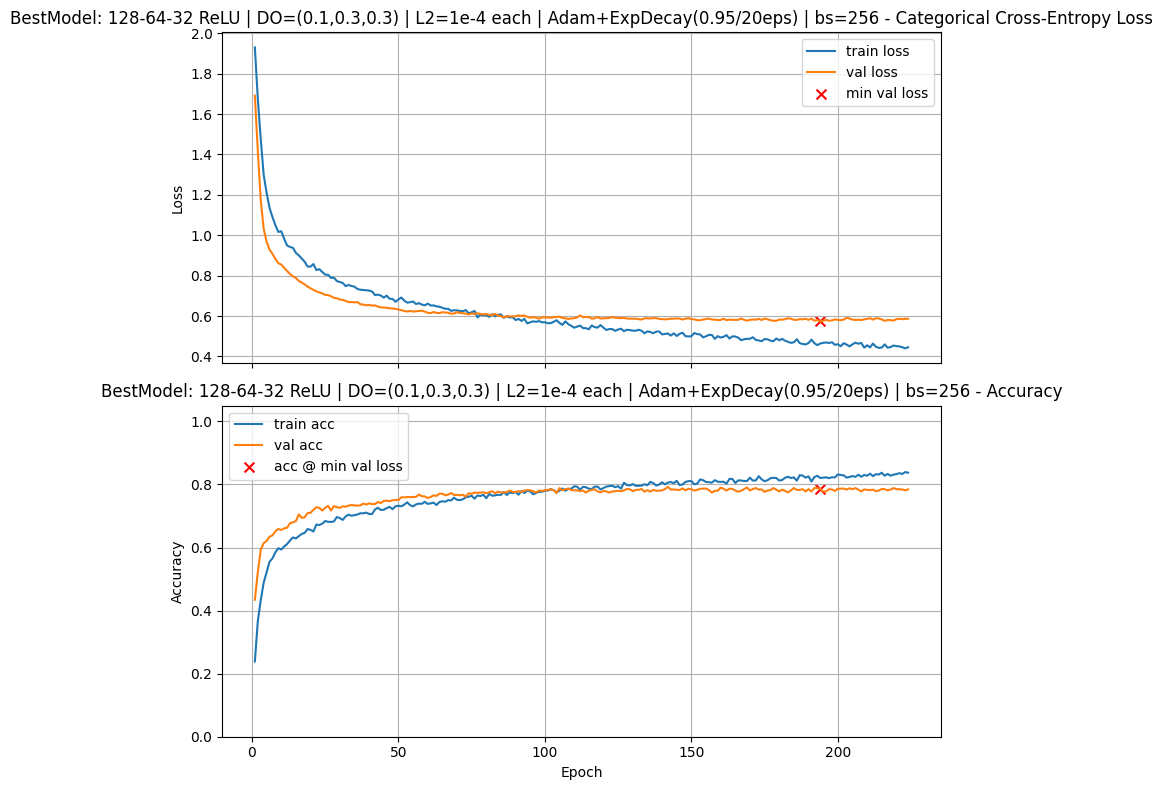

Final Training Loss:            0.4457
Final Training Accuracy:        0.8374
Final Validation Loss:          0.5865
Final Validation Accuracy:      0.7843
Minimum Validation Loss:        0.5733 (Epoch 194)
Validation Accuracy @ Min Loss: 0.7864

Test Loss: 0.6058
Test Accuracy: 0.7786

Validation-Test Gap (accuracy): 0.007857

Execution Time: 00:00:26

--- Summary (Problem 6) ---
Dropout first=0.2, second=0.3 | ReLU | 64→32 | L2=[0,1e-3]	0.7957
DO=(0.1,0.3), L2=(0.0001,0.0001) | ReLU | 64→32	0.7957
DO=(0.2,0.2), L2=(0.001,0.001) | ReLU | 64→32	0.7950
Dropout first=0.2, second=0.4 | ReLU | 64→32 | L2=[0,1e-3]	0.7929
DO=(0.1,0.2), L2=(0.0001,0.0001) | ReLU | 64→32	0.7921
Dropout first=0.2, second=0.5 | ReLU | 64→32 | L2=[0,1e-3]	0.7914
DO=(0.1,0.2), L2=(0.001,0.001) | ReLU | 64→32	0.7886
DO=(0.2,0.2), L2=(0.0001,0.0001) | ReLU | 64→32	0.7879
Dropout first=0.0, second=0.5 | ReLU | 64→32 | L2=[0,1e-3]	0.7871
BestModel: 128-64-32 ReLU | DO=(0.1,0.3,0.3) | L2=1e-4 each | Adam+ExpDecay(0.95/

In [40]:
# Your code here

from math import ceil

batch_size = 256
steps_per_epoch = ceil(len(X_train) / batch_size)
lr_sched = ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=steps_per_epoch * 20,
    decay_rate=0.95,
    staircase=True
)

best_model = build_model(
    n_inputs=X_train.shape[1],
    layer_list=[
        (128, "relu", 1e-4, 0.10),
        (64,  "relu", 1e-4, 0.30),
        (32,  "relu", 1e-4, 0.30),
    ],
    n_classes=n_classes
)

_ = train_and_test(
    best_model,
    epochs=600,
    lr_schedule=lr_sched,
    optimizer="Adam",
    title="BestModel: 128-64-32 ReLU | DO=(0.1,0.3,0.3) | L2=1e-4 each | Adam+ExpDecay(0.95/20eps) | bs=256",
    batch_size=batch_size,
    use_early_stopping=True,
    patience=30,
    min_delta=1e-4,
    callbacks=[],
    verbose=0,
    return_history=False
)

print("\n--- Summary (Problem 6) ---")
print_results()

In [41]:
# Set a6 to the validation accuracy found by this best model

a6 = 0.7957             # Replace 0.0 with your answer

In [42]:
# Graded Answer
# DO NOT change this cell in any way          

print(f'a6 = {a6:.4f}') 

a6 = 0.7957


### Optional: Print out your results of all experiments

In [43]:
print_results()

Dropout first=0.2, second=0.3 | ReLU | 64→32 | L2=[0,1e-3]	0.7957
DO=(0.1,0.3), L2=(0.0001,0.0001) | ReLU | 64→32	0.7957
DO=(0.2,0.2), L2=(0.001,0.001) | ReLU | 64→32	0.7950
Dropout first=0.2, second=0.4 | ReLU | 64→32 | L2=[0,1e-3]	0.7929
DO=(0.1,0.2), L2=(0.0001,0.0001) | ReLU | 64→32	0.7921
Dropout first=0.2, second=0.5 | ReLU | 64→32 | L2=[0,1e-3]	0.7914
DO=(0.1,0.2), L2=(0.001,0.001) | ReLU | 64→32	0.7886
DO=(0.2,0.2), L2=(0.0001,0.0001) | ReLU | 64→32	0.7879
Dropout first=0.0, second=0.5 | ReLU | 64→32 | L2=[0,1e-3]	0.7871
BestModel: 128-64-32 ReLU | DO=(0.1,0.3,0.3) | L2=1e-4 each | Adam+ExpDecay(0.95/20eps) | bs=256	0.7864
DO=(0.1,0.3), L2=(0.001,0.001) | ReLU | 64→32	0.7850
Act=relu | 64→32 | L2=[0,1e-3] | Dropout=0.3	0.7843
LR=0.001 | ReLU | 64→32 | L2=[0,1e-3] | Dropout=0.3	0.7836
Dropout first=0.1, second=0.5 | ReLU | 64→32 | L2=[0,1e-3]	0.7836
Dropout first=0.1, second=0.3 | ReLU | 64→32 | L2=[0,1e-3]	0.7800
Dropout first=0.1, second=0.4 | ReLU | 64→32 | L2=[0,1e-3]	0.7779

## Reflection Questions (ungraded)

1. Activation Functions:

    - Why do you think one activation function worked better than the others for this task?
    
    - How might this choice differ for deeper or wider networks?

2. Learning Rate:

    - Would a much smaller learning rate (with many more epochs) likely produce better accuracy?
    
    - When is it worth training longer with a smaller step size, and when is it unnecessary?

3. Dropout vs. L2:

    - Which form of regularization — dropout or L2 — gave better results in your experiments?
    
    - Why might one method be more effective in this setting?

4. Combining Dropout and L2:

    - Why might the combination of dropout and L2 sometimes perform worse than using one method alone?
    
    - What does this tell you about the balance between bias and variance in regularization?

5. Best Model:

    - When you designed your best model, what trade-offs did you notice between model complexity, training stability, and generalization?
    
    - Did learning rate scheduling (if you tried it) improve results? Why might it help?